# Анализ целей обучения студентов Яндекс Практикума

## Общая информация

В нашем распоряжении данные об ответах студентов на вопросы касающиеся целей обучения и метрики их знаний (субъективные и объективные) 
Необходимо проанализировать и выделить группы студентов, которым нужна помощь  

**Цели исследования:**
 * определить нормальные и найти аномальные показатели
 * определить коррелирующие параметры, построить портреты студентов, сравнить их, чтобы выделить значимые закономерности
 * сегментировать студентов (по 2м и более показателям), выявить особенности сегментов
 * сформулировать на основе данных гипотезы по улучшению выстраивания помощи студентам в достижении их целей

**План исследования:**

 * предобработка данных:
 * исследовательский анализ данных: 
   * распределение ответов
   * предварительное формирование сегментов покупателей
   * окончательное формирование сегментов покупателей
   * формирование гипотез и проверка статистической значимости между сегментами покупателей
 * выводы

In [ ]:
pip install jenkspy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# импорт библиотек
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
from matplotlib.ticker import EngFormatter
import matplotlib.ticker as mtick
import warnings 
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50)
pd.set_option('max_colwidth', 500)
import itertools
import jenkspy

In [ ]:
# загрузка данных
try:
    answers = pd.read_csv('C:/Users/Admin/Downloads/data_goals_answers_fin.csv',index_col=0)
except:
    answers = pd.read_csv('https://raw.githubusercontent.com/KaterinaFrolkova/categories/main/data_goals_answers_fin.csv',index_col=0)

try:
    metrics = pd.read_csv(r'C:\Users\Admin\Downloads\hackathon_metrics.csv',index_col=0)
except:
    metrics = pd.read_csv('https://raw.githubusercontent.com/KaterinaFrolkova/categories/main/hackathon_metrics.csv',index_col=0)

**Общая информация о таблице с ответами**

In [ ]:
answers.sample(5)

,user_id,answer_date,answer_id,cohort,course_name,current_cohort,current_segment,lesson_name,original_segment,profession_name,question_title,question_type,slide_position,statement_content,topic_name,user_answer
17199,11202020,2023-08-08 15:23:00,19600d1e-7189-4e88-900e-94c6500f1a2a,ds_cohort_101,Трудоустройство,ds_cohort_101,b2g,Цель обучения,b2g,data-scientist,"Для программы важно понять над чем вам нужно поработать. Не переживайте, вам будут доступны все опции.",checkbox,0,NaN,Трудоустройство,устройство рынка труда
15761,8674589,2023-08-14 13:17:00,f12b037e-2c62-4f5e-bc48-73a853fb210b,ds_cohort_105,Трудоустройство,ds_cohort_105,b2g,Цель обучения,b2g,data-scientist,"Для программы важно понять над чем вам нужно поработать. Не переживайте, вам будут доступны все опции.",checkbox,0,NaN,Трудоустройство,оценка шансов на трудоустройство
9757,2642062,2023-09-19 09:51:00,63e5e39f-051f-406c-a8d4-0f89644070ad,data_cohort_115,Трудоустройство,data_cohort_115,b2g,Цель обучения,b2g,data-analyst,"Для программы важно понять над чем вам нужно поработать. Не переживайте, вам будут доступны все опции.",checkbox,0,NaN,Трудоустройство,определение стратегии поиска работы
23956,14166963,2023-08-05 21:21:00,5649355d-7f2d-4190-ba80-8c71a25bf9b8,data_cohort_119,Трудоустройство,data_cohort_119,b2c,Цель обучения,b2c,data-analyst,"Тут вы можете оставить свой комментарий, если не нашли подходящего варианта ответа.",text,1,NaN,Трудоустройство,[
18301,12239402,2023-09-20 22:40:00,a483e8f5-70ac-4501-9396-f6279ef900fa,ds_cohort_79,Трудоустройство,ds_cohort_79,b2g,Цель обучения,b2g,data-scientist,"Для программы важно понять над чем вам нужно поработать. Не переживайте, вам будут доступны все опции.",checkbox,0,NaN,Трудоустройство,оформление портфолио


In [ ]:
answers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43428 entries, 1 to 43428
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            43428 non-null  int64  
 1   answer_date        43428 non-null  object 
 2   answer_id          43428 non-null  object 
 3   cohort             43428 non-null  object 
 4   course_name        43428 non-null  object 
 5   current_cohort     43428 non-null  object 
 6   current_segment    43223 non-null  object 
 7   lesson_name        43428 non-null  object 
 8   original_segment   43223 non-null  object 
 9   profession_name    43428 non-null  object 
 10  question_title     43428 non-null  object 
 11  question_type      43428 non-null  object 
 12  slide_position     43428 non-null  int64  
 13  statement_content  0 non-null      float64
 14  topic_name         43428 non-null  object 
 15  user_answer        43417 non-null  object 
dtypes: float64(1), int64(2

**Описание данных**

* `user_id` — уникальный id пользователя  
* `answer_date` — время ответа
* `answer_id` — id ответа  
* `cohort` — начальная когорта студента
* `current_cohort` — текущая когорта студента  
* `original_segment, current_segment` — b2c/b2b/b2g — из какого сегмента был/стал студент — сам является клиентом, его обучение оплачивается бизнесом или государством
* `course_name, topic_name` — курс и тема, на котором студент отвечает на вопрос, в нашем случае `Трудоустройство`  
* `lesson_name` — урок, на котором студент отвечает на вопрос, в нашем случае `Цель обучения`
* `profession_name` — код профессии
* `question_title` — текст вопроса
* `question_type` — тип вопроса
* `slide_position` — страница опроса (не нужно для анализа)  
* `statement_content` — формулировка вопроса об уверенности в знаниях (в этой таблице не заполнено)
* `user_answer` — ответ пользователя на вопрос


**Общая информация о таблице с метриками студентов**

In [ ]:
metrics.sample(5)

,profession_name,user_id,lp_avg_user,statement_content,value,question_title,user_answer
61553,data-analyst,14841017,0.770000,Моя уверенность в своих знаниях значительно повысилась по сравнению с предыдущим спринтом,-2,NaN,NaN
15104,data-analyst-plus,914636,0.760000,Моя уверенность в своих знаниях значительно повысилась по сравнению с предыдущим спринтом,2,NaN,NaN
24288,data-scientist-plus,14215677,0.430000,Моя уверенность в своих знаниях значительно повысилась по сравнению с предыдущим спринтом,0,NaN,NaN
52724,data-scientist,7989313,0.558333,Моя уверенность в своих знаниях значительно повысилась по сравнению с предыдущим спринтом,2,NaN,NaN
61876,data-scientist,1895911,0.784286,Моя уверенность в своих знаниях значительно повысилась по сравнению с предыдущим спринтом,1,NaN,NaN


In [ ]:
metrics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79117 entries, 0 to 79116
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   profession_name    79117 non-null  object 
 1   user_id            79117 non-null  int64  
 2   lp_avg_user        79117 non-null  float64
 3   statement_content  79117 non-null  object 
 4   value              79117 non-null  int64  
 5   question_title     14739 non-null  object 
 6   user_answer        14739 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 4.8+ MB


**Описание данных**
* `profession_name` — код профессии
* `user_id` — уникальный id пользователя
* `lp_avg_user` — средний learning performance — оценка того, как хорошо студент справляется (по данным Практикума), от 0 до 1
* `statement_content` — формулировка вопроса об уверенности в знаниях студента  
* `value` — ответ студента на вопрос об уверенности в знаниях для расчёта learning experience индекса, от -2 до 2
* `question_title` — текст вопроса о рекомендации Практикума свом друзьям
* `user_answer` — ответ пользователя этот вопрос  

Известно, что данные об оценках даны в разрезе нескольких периодов, данные отсортированы от более старых дат к более новым.
 


Распределение уникальных значений в таблицах

In [ ]:
answers.nunique()

user_id               3549
answer_date           7882
answer_id            14094
cohort                 169
course_name              1
current_cohort         173
current_segment          3
lesson_name              1
original_segment         3
profession_name         11
question_title           6
question_type            3
slide_position           2
statement_content        0
topic_name               1
user_answer           1102
dtype: int64

In [ ]:
metrics.nunique()

profession_name        10
user_id              9797
lp_avg_user          3574
statement_content       1
value                   5
question_title          1
user_answer            11
dtype: int64

### Функции

In [ ]:
def review (length, height, y, x, data, bins=50,rotation=0):
    plt.figure(figsize = (length, height))
    title_set = 0
    seria = 1
    plt.subplots_adjust(hspace = 0.3)

    for n in name:
        ax = plt.subplot(y, x, seria)
        sns.histplot(data[~data[n].isnull()][n], bins=bins,ax = ax, color = '#21209C')
        plt.ylabel("частота",size = 12)
        plt.xlabel("значение",size = 12)
        plt.xticks(rotation=rotation)
        plt.title(title[title_set], size =20);
        seria +=1
        title_set +=1
    plt.tight_layout()
    plt.show();

In [ ]:
def zeros (name):
    for i in name.columns.tolist():
        print(i,len(name[name[i]==0]))

In [ ]:
def barchart (length, height, data, x, y, palette, title, xlabel, ylabel, despinet, despiner, despinel, despineb, n, m=1, 
            horizont=True, perc_frmt=False, set_xticks=False, set_yticks=True, order=None, ylim=None, hue=None, edgecolor=None,
             k=False):
    
    # размеры
    plt.figure(figsize=(length, height))
    # график
    ax = sns.barplot(data = data, x=x, y=y, dodge=False, palette = palette, order=order, hue = hue, edgecolor=edgecolor)
    # название
    ax.axes.set_title(title, size = 20)
    # подпись ось x
    ax.set_xlabel(xlabel)
    # подпись ось y
    ax.set_ylabel(ylabel)
    # размер подпсиси
    ax.tick_params(labelsize=10) 
    # края графика
    sns.despine(top=despinet, right=despiner, left=despinel, bottom=despineb)
    
    # подписи
    #горизонтальный чарт
    if horizont==1:
        if perc_frmt==1:
            # процентная шкала
            ax.xaxis.set_major_formatter(mtick.PercentFormatter())
            # подписи данных в процентах
            for p in ax.patches:
                ax.annotate(f"{p.get_width():.{n}f}%", (p.get_width(), p.get_y()+p.get_height()/2),
                    xytext=(5, 0), textcoords='offset points', ha="left", va="center", fontsize=12)       
        else:
            if k==0:
                # подписи данных не в процентах 
                for p in ax.patches:
                    ax.annotate(f"{p.get_width()/m:.{n}f}", (p.get_width(), p.get_y() + p.get_height() / 2),
                        xytext=(5, 0),textcoords='offset points', ha='left', va='center', fontsize=12)
            else:
                # подписи данных не в процентах и с K
                for p in ax.patches:
                    ax.annotate(f"{p.get_width()/m:.{n}f}K", (p.get_width(), p.get_y() + p.get_height() / 2),
                        xytext=(5, 0),textcoords='offset points', ha='left', va='center', fontsize=12)
                
    # вертикальный чарт            
    else:
        if perc_frmt==1:
            # процентная шкала
            ax.xaxis.set_major_formatter(mtick.PercentFormatter())
            # подписи данных в процентах
            for p in ax.patches:
                ax.annotate(f"{p.get_height():.{n}f}%", (p.get_x() + p.get_width() / 2, p.get_height()),
                xytext=(0, 8),textcoords='offset points', ha='center', va='center', fontsize=12)    
        else:
            # подписи данных не в процентах 
            for p in ax.patches:
                ax.annotate(f"{p.get_height()/m:.{n}f}", (p.get_x() + p.get_width() / 2, p.get_height()),
                xytext=(0, 8),textcoords='offset points', ha='center', va='center', fontsize=12)            
    # ограничение
    ax.set_ylim(ylim)
    
    # отсутствие оси x       
    if set_xticks == 0:
        ax.set_xticks([])
        
    # отсутствие оси y       
    if set_yticks == 0:
        ax.set_yticks([]);

In [ ]:
def doughnut (length, height, data, colors, n, title, labels, counterclock=True, color='b'):
    # размер
    plt.figure(figsize=(length, height))
    # строим пирог
    plt.pie(data, colors=colors, startangle=90,counterclock=counterclock\
            , autopct=lambda p:f'{p:.{n}f}%', textprops={'fontsize': 12, 'color':color}\
            , pctdistance=0.85)
    # центр
    centre_circle = plt.Circle((0, 0), 0.60, fc='white')
    fig = plt.gcf()
    # добавляем центр
    fig.gca().add_artist(centre_circle)
    # название
    plt.title(title, size =20)
    # легенда
    plt.legend(labels=labels, bbox_to_anchor=(1, 0.95), loc='upper left')
    plt.show()
    #plt.savefig(f"{title}.svg",format="svg")

In [ ]:
def barh (data, length, height, title, xlabel, ylabel, despinet, despiner, despinel, despineb, 
            n, perc_frmt=False, set_xticks=False, legend=False, legend_text=[], stacked=True, width = 0.75):
    # график
    ax = data.plot(figsize=(length, height), kind='barh', stacked=stacked, width = width)
    # название
    ax.axes.set_title(title, size = 20)
    # подпись ось x
    ax.set_xlabel(xlabel)
    # подпись ось y
    ax.set_ylabel(ylabel)
    # легенда
    if legend==1:
        plt.legend(labels=legend_text, bbox_to_anchor=(1, 1), loc='best')
    # размер подпсиси
    ax.tick_params(labelsize=12) 
    # края графика
    sns.despine(top=despinet, right=despiner, left=despinel, bottom=despineb)

    if perc_frmt==1:
        # процентная шкала
        ax.xaxis.set_major_formatter(mtick.PercentFormatter())
        # подписи данных в процентах
        for p in ax.patches:
            if p.get_width()>0:
                label_text = f"{p.get_width():.{n}f}%"
            else:
                label_text = ''
        
            label_x = p.get_x() + p.get_width() / 2
            label_y = p.get_y() + p.get_height() / 2
            ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=10)              
    else:
        # подписи данных не в процентах 
        for p in ax.patches:
            if p.get_width()>0:
                label_text = f"{p.get_width():.{n}f}"
            else:
                label_text = ''
        
            label_x = p.get_x() + p.get_width() / 2
            label_y = p.get_y() + p.get_height() / 2
            ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=10)
    
    # отсутствие оси x       
    if set_xticks == 0:
        ax.set_xticks([])
    plt.show();

In [ ]:
def viz_multiply(param, dict_title, data_1, data_2, data_3, position_opt):

  counter = 1
  for key, value in dict_title.items():
      if counter != position_opt:
        print(20*'-'+ f'{key.upper()}'+' ДЛЯ '+f'{param.upper()}'+20*'-')
        cnt_goals = (
             data_1[[param,'user_id',f'{key}']]
             .pivot_table(index=param,
                          columns=f'{key}',
                          values='user_id',
                          aggfunc='count')
              )
        cnt_goals_prct = cnt_goals.copy()
        cols = cnt_goals.columns.values
        cnt_goals_prct[cols] = (
              cnt_goals_prct[cols]
              .div(cnt_goals_prct[cols]
                  .sum(axis=1), axis=0)
              .multiply(100)
              )
        order = data_2[data_2['question']==f'{key}']['user_answer'][::-1]
        cnt_goals_prct = cnt_goals_prct.reindex(columns=order)
        cnt_goals_prct = cnt_goals_prct.sort_values(by=cnt_goals_prct.columns[0])
        #display(cnt_goals_prct)
        #визуализируем
        barh (cnt_goals_prct, 12, 8,
                f'{value} \n', 'доли', 
                '', 1, 1, 1, 1, 0,perc_frmt= 1,
                legend=1, legend_text=order)
        counter +=1
      else:
          print(20*'-'+ f'{key.upper()}'+' ДЛЯ '+f'{param.upper()}'+20*'-')
          cnt_help = (
              data_3[data_3['question']==f'{key}']
              .pivot_table(index=param,
                          columns='user_answer',
                          values='user_id',
                          aggfunc='nunique')
              )
          cnt_help_prct = cnt_help.copy()
          cols = cnt_help.columns.values
          cnt_help_prct[cols] = (
              cnt_help_prct[cols]
              .div(cnt_help_prct[cols]
                  .sum(axis=1), axis=0)
              .multiply(100)
              )
          order = data_2[data_2['question']==f'{key}']['user_answer'][::-1]
          cnt_help_prct = cnt_help_prct.reindex(columns=order)
          cnt_help_prct = cnt_help_prct.sort_values(by=cnt_help_prct.columns[0])
          #display(cnt_help_prct)
          #визуализируем
          barh (cnt_help_prct, 12, 8, f'{value}  \n',
                'Доли', '', 1, 1, 1, 1, 0,
                perc_frmt= 1, legend=1, 
                legend_text=order)
          counter += 1

In [ ]:
def heatmapCr(data, title, xlabel, ylabel, figsize=(10, 10), fontsize=None, cmap='Blues', annot=True, 
              cbar=False, linewidths=5, linecolor='white', fmt=None, vmin=None, vmax=None):
    plt.figure(figsize=figsize)
    sns.heatmap(data, cmap=cmap, annot=annot, cbar=cbar, 
                linewidths=linewidths, linecolor=linecolor, fmt=fmt, vmin=vmin)
    plt.title(f'{title} \n', fontsize=fontsize)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show();

In [ ]:
# функция для теста Манна Уитни
def test_mwu_update(value, p_list, name_list):
  all_group = (
      [list(j) for i in range(len(np.sort(data['pc_score'].unique()))) 
      for j in itertools.combinations(np.sort(data['pc_score'].unique()) , i+1)]
      )
  test_group = [i for i in all_group if len(i) == 2]
  alpha =0.05
  for uniq in test_group:
    gr_1 = data[data['pc_score']==uniq[0]][value]
    gr_2 = data[data['pc_score']==uniq[1]][value]
    name = f'gr_{uniq[0]}_'+ f'gr_{uniq[1]}'
    results = st.mannwhitneyu(
    gr_1, gr_2)
    p_list.append(results.pvalue)
    name_list.append(name)
    print('Гипотезы. \n')
    print(f'H0 - Между gr_{uniq[0]} и gr_{uniq[1]} статистически значимого отличия нет.')
    print(f'H1 - Между gr_{uniq[0]} и gr_{uniq[1]} есть статистически значимая разница.')
    print(' \n')
    print('alpha: {:.3f}'.format (alpha))
    print(f'Среднее первой группы gr_{uniq[0]} : '+'{:.3f}'.format (gr_1.mean()))
    print(f'Среднее второй группы gr_{uniq[1]} : '+'{:.3f}'.format (gr_2.mean()))
    print('results.pvalue: {:.5f}'.format (results.pvalue))
    print(60*'-')

## Предобработка данных

### Преобразование форматов

In [ ]:
answers['answer_date'] = pd.to_datetime(answers['answer_date'])

### Обзор данных

**Таблица `answers`**

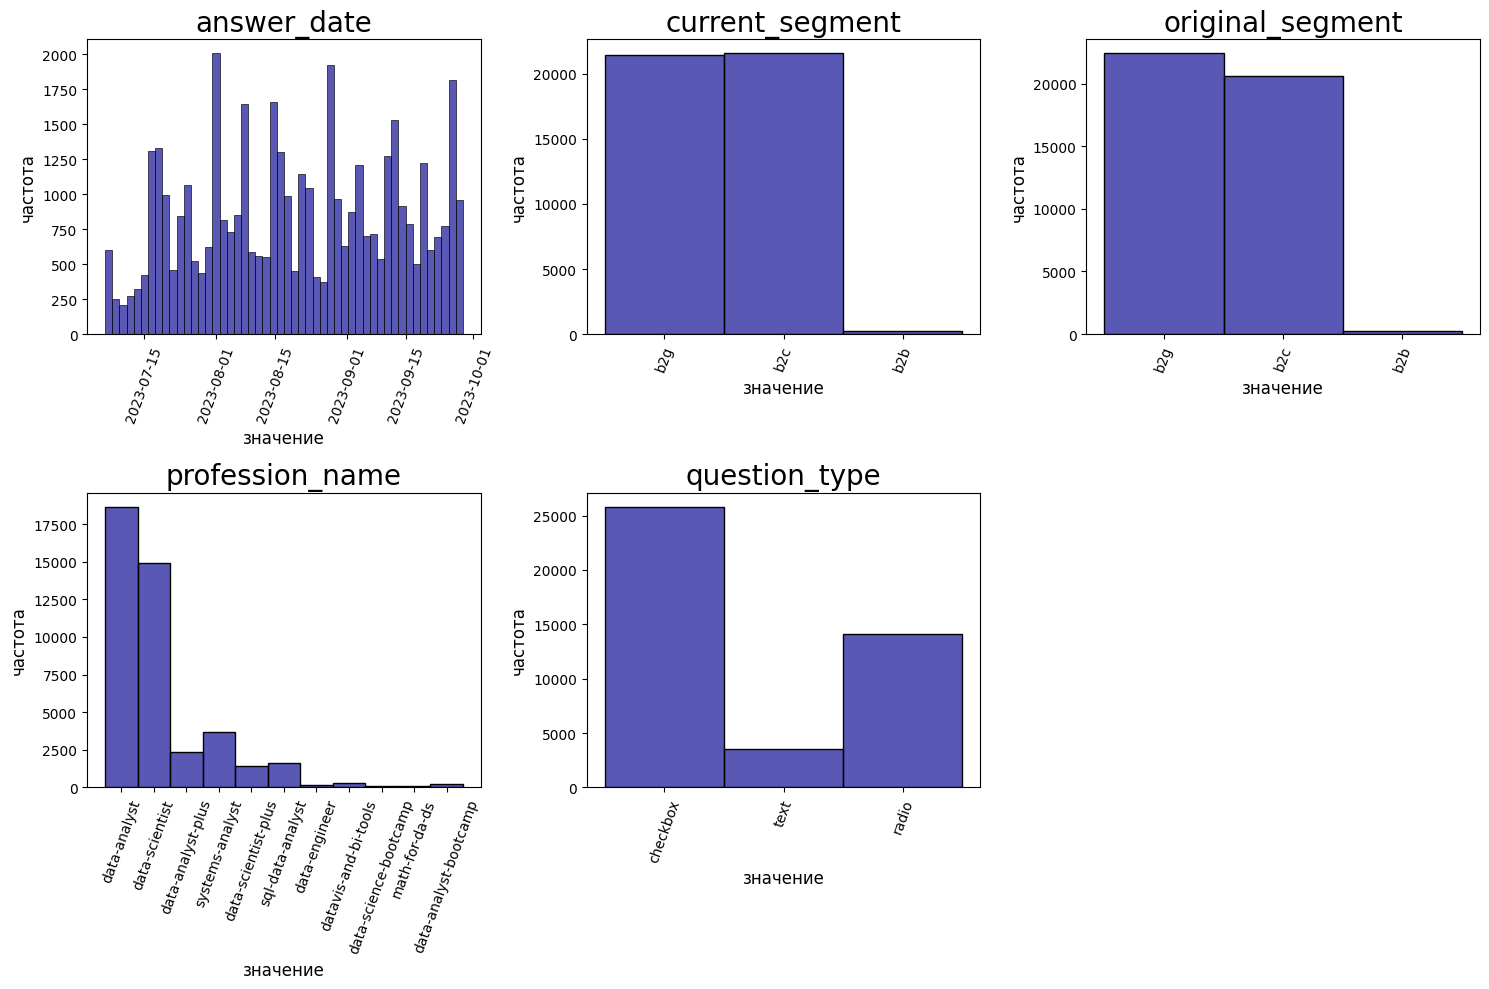

In [ ]:
name = ['answer_date', 'current_segment', 'original_segment', 'profession_name'\
        , 'question_type']
title = ['answer_date', 'current_segment', 'original_segment', 'profession_name'\
        , 'question_type']
review (15,10, 2, 3, answers,rotation=70)

В таблице с ответами данные предоставлены за три месяца - июль 2023-сентябрь 2023, выбивающихся дат нет  
Распределение по сегментам - B2C и B2G примерно 50/50, сегмент B2B представлен мало  
По окончании обучения у некоторых сегмент B2G меняется на B2C, возможно это связано с тем, что студент не укладывается в сроки и продолжает обучение за свой счет.  
В датасете 11 профессий, в основном это DA и DS, на третьем месте системные аналитики, остальные группы это более точечные направления.  
Вопросы представлены тремя типами - чекбокс, radio- выбор одного варианта из нескольких и открытый текстовый ответ.

**Таблица `metrics`**

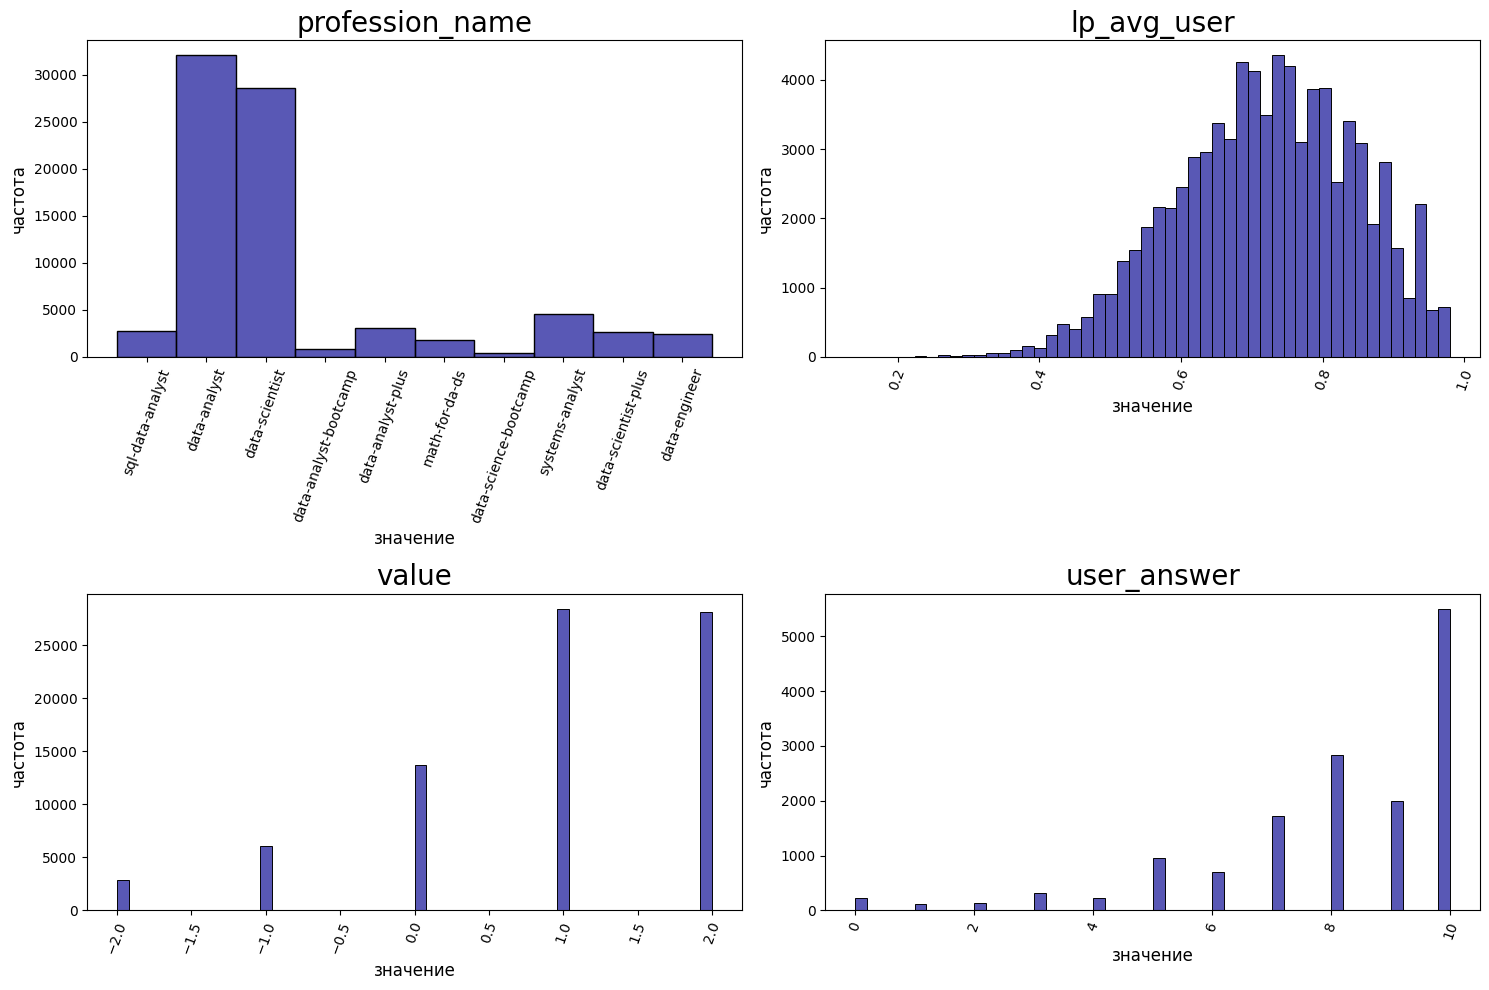

In [ ]:
name = ['profession_name', 'lp_avg_user', 'value', 'user_answer']
title = ['profession_name', 'lp_avg_user', 'value', 'user_answer']
review (15,10, 2, 2, metrics,rotation=70)

В датасете 10 профессий, в основном это DA и DS, на третьем месте системные аналитики, остальные группы это более точечные направления.  
Оценка `средний learning performance` распределена от 0 до 1, без выбросов и аномальных значений.  
Распределение ассиметрично, скошено влево. Самые распространенные оценки 0.7-0.8. Нужно учесть,что оценки в датасете повторяются для одного и того же студента.  
Оценки на вопрос об уверенности студена в собственных знаниях распределена от-2 до 2, Большая чачть ответов это 1 и 2.  
Ответы на вопрос о рекомендации рапсределены от 0 до 10, большая часть ответов это оценка 10.

### Пропуски и нулевые значения

In [ ]:
spisok = ['answers','metrics']

**Пропуски**

In [ ]:
for table_name in spisok:
    table = eval(table_name)
    null_counts = table.isna().sum()
    print('\n' + table_name + ':')
    print(null_counts)


answers:
user_id                  0
answer_date              0
answer_id                0
cohort                   0
course_name              0
current_cohort           0
current_segment        205
lesson_name              0
original_segment       205
profession_name          0
question_title           0
question_type            0
slide_position           0
statement_content    43428
topic_name               0
user_answer             11
dtype: int64

metrics:
profession_name          0
user_id                  0
lp_avg_user              0
statement_content        0
value                    0
question_title       64378
user_answer          64378
dtype: int64


Визуализируем пропуски

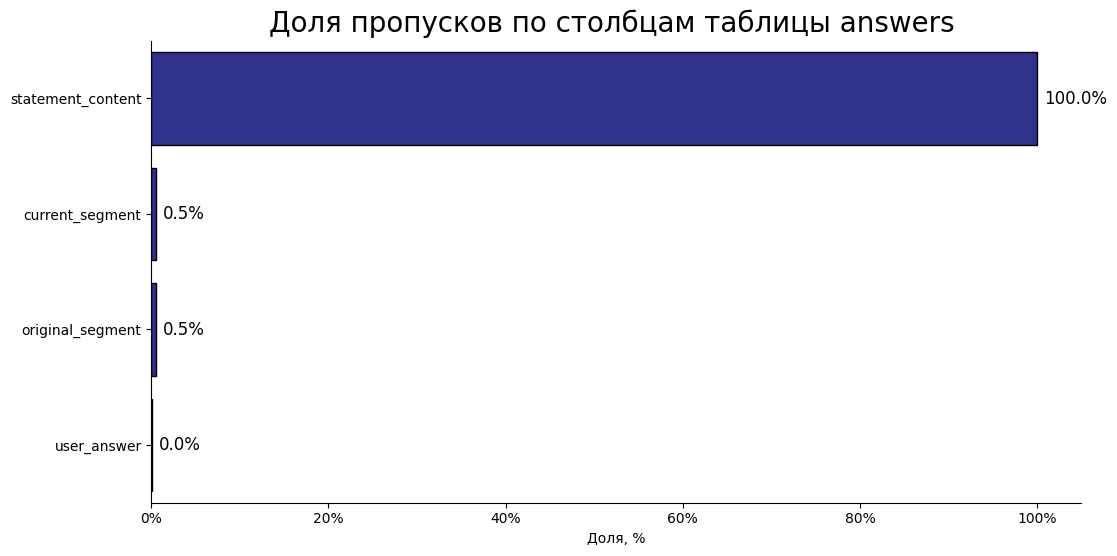

In [ ]:
gaps_answers = (answers.isna().mean()*100).to_frame(name='gaps').query('gaps > 0').sort_values(by='gaps', ascending = False)

# визуализируем
barchart (12, 6, gaps_answers, 'gaps', gaps_answers.index, ['#21209C'], 
             'Доля пропусков по столбцам таблицы answers ', 'Доля, %', '',1,1,0,0,1,perc_frmt=1,set_xticks=1, edgecolor='black')

Столбец `statement_content`не заполенен, данные с пропусками сегментов можно удалить.

In [ ]:
answers = answers.dropna(subset=['original_segment','current_segment', 'user_answer'])

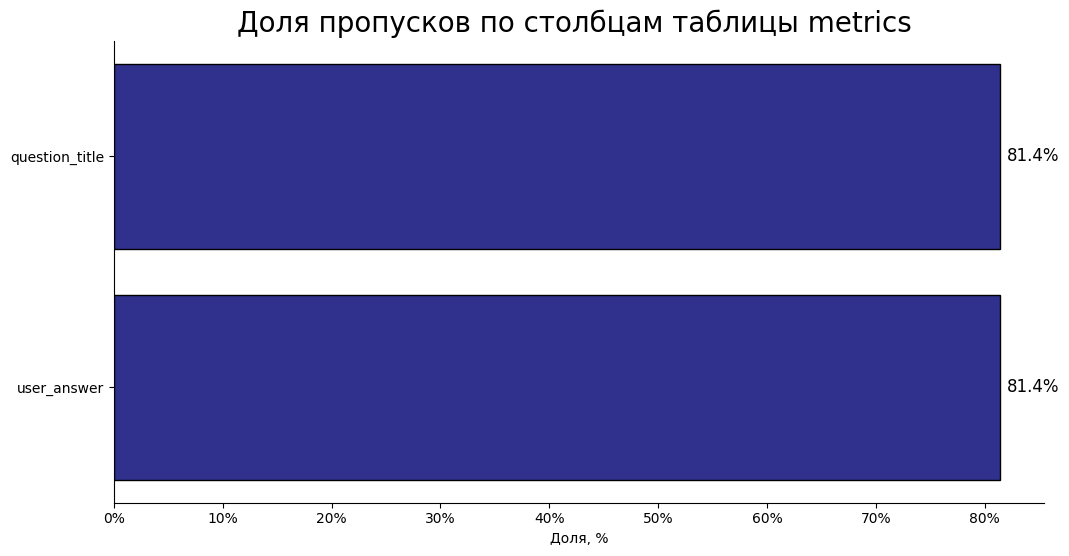

In [ ]:
gaps_metrics = (metrics.isna().mean()*100).to_frame(name='gaps').query('gaps > 0').sort_values(by='gaps', ascending = False)

# визуализируем
barchart (12, 6, gaps_metrics, 'gaps', gaps_metrics.index, ['#21209C'], 
             'Доля пропусков по столбцам таблицы metrics ', 'Доля, %', '',1,1,0,0,1,perc_frmt=1,set_xticks=1, edgecolor='black')

80% строк с ответом на вопрос о рекомендации не заполенено, тк не все отвечали на этот вопрос.  
Оставим эти пропуски.

**Нулевые значения**

In [ ]:
for table_name in spisok:
    table = eval(table_name)
    print('\n' + table_name + ':')
    zeros(table)


answers:
user_id 0
answer_date 0
answer_id 0
cohort 0
course_name 0
current_cohort 0
current_segment 0
lesson_name 0
original_segment 0
profession_name 0
question_title 0
question_type 0
slide_position 36246
statement_content 0
topic_name 0
user_answer 0

metrics:
profession_name 0
user_id 0
lp_avg_user 0
statement_content 0
value 13718
question_title 0
user_answer 234


Есть нули в столбце slide_position таблицы answers и в столбце user_answer таблицы metrics.  
В данном случае эти значения корректны.

### Проверка дубликатов

**Таблица answers**

In [ ]:
display(answers[answers.duplicated()])

,user_id,answer_date,answer_id,cohort,course_name,current_cohort,current_segment,lesson_name,original_segment,profession_name,question_title,question_type,slide_position,statement_content,topic_name,user_answer


Проверим отвечал ли студент на один и тот же вопрос дважды

In [ ]:
display(answers[answers[['user_id','question_title']].duplicated(keep=False)].head(10))

,user_id,answer_date,answer_id,cohort,course_name,current_cohort,current_segment,lesson_name,original_segment,profession_name,question_title,question_type,slide_position,statement_content,topic_name,user_answer
1,3157,2023-09-01 10:43:00,41ac1a75-1f3b-44bd-a2f2-346c3bdef7b3,data_cohort_121,Трудоустройство,data_cohort_121,b2g,Цель обучения,b2g,data-analyst,"Для программы важно понять над чем вам нужно поработать. Не переживайте, вам будут доступны все опции.",checkbox,0,NaN,Трудоустройство,определение профессиональной сферы
4,3157,2023-09-01 10:43:00,41ac1a75-1f3b-44bd-a2f2-346c3bdef7b3,data_cohort_121,Трудоустройство,data_cohort_121,b2g,Цель обучения,b2g,data-analyst,"Для программы важно понять над чем вам нужно поработать. Не переживайте, вам будут доступны все опции.",checkbox,0,NaN,Трудоустройство,персональная карьерная консультация
5,3157,2023-09-01 10:43:00,41ac1a75-1f3b-44bd-a2f2-346c3bdef7b3,data_cohort_121,Трудоустройство,data_cohort_121,b2g,Цель обучения,b2g,data-analyst,"Для программы важно понять над чем вам нужно поработать. Не переживайте, вам будут доступны все опции.",checkbox,0,NaN,Трудоустройство,устройство рынка труда
6,3157,2023-09-01 10:43:00,41ac1a75-1f3b-44bd-a2f2-346c3bdef7b3,data_cohort_121,Трудоустройство,data_cohort_121,b2g,Цель обучения,b2g,data-analyst,"Для программы важно понять над чем вам нужно поработать. Не переживайте, вам будут доступны все опции.",checkbox,0,NaN,Трудоустройство,как и куда можно расти как специалисту
8,3157,2023-09-01 10:43:00,41ac1a75-1f3b-44bd-a2f2-346c3bdef7b3,data_cohort_121,Трудоустройство,data_cohort_121,b2g,Цель обучения,b2g,data-analyst,"Для программы важно понять над чем вам нужно поработать. Не переживайте, вам будут доступны все опции.",checkbox,0,NaN,Трудоустройство,сопроводительное письмо
9,3157,2023-09-01 10:43:00,41ac1a75-1f3b-44bd-a2f2-346c3bdef7b3,data_cohort_121,Трудоустройство,data_cohort_121,b2g,Цель обучения,b2g,data-analyst,"Для программы важно понять над чем вам нужно поработать. Не переживайте, вам будут доступны все опции.",checkbox,0,NaN,Трудоустройство,резюме
10,3157,2023-09-01 10:43:00,41ac1a75-1f3b-44bd-a2f2-346c3bdef7b3,data_cohort_121,Трудоустройство,data_cohort_121,b2g,Цель обучения,b2g,data-analyst,"Для программы важно понять над чем вам нужно поработать. Не переживайте, вам будут доступны все опции.",checkbox,0,NaN,Трудоустройство,решение тестовых заданий
14,5415,2023-08-03 13:40:00,9241a6bb-fa0a-4d56-944f-b32780d086f6,data_cohort_117,Трудоустройство,data_cohort_119,b2g,Цель обучения,b2g,data-analyst,"Для программы важно понять над чем вам нужно поработать. Не переживайте, вам будут доступны все опции.",checkbox,0,NaN,Трудоустройство,оценка шансов на трудоустройство
17,5415,2023-08-03 13:40:00,9241a6bb-fa0a-4d56-944f-b32780d086f6,data_cohort_117,Трудоустройство,data_cohort_119,b2g,Цель обучения,b2g,data-analyst,"Для программы важно понять над чем вам нужно поработать. Не переживайте, вам будут доступны все опции.",checkbox,0,NaN,Трудоустройство,устройство рынка труда
18,5415,2023-08-03 13:40:00,9241a6bb-fa0a-4d56-944f-b32780d086f6,data_cohort_117,Трудоустройство,data_cohort_119,b2g,Цель обучения,b2g,data-analyst,"Для программы важно понять над чем вам нужно поработать. Не переживайте, вам будут доступны все опции.",checkbox,0,NaN,Трудоустройство,как и куда можно расти как специалисту


На вопрос об опциях помощи допустимо несколько ответов

Проверим повторы на других вопросах

In [ ]:
display(answers.loc[answers['question_title']!='Для программы важно понять над чем вам нужно поработать. Не переживайте, вам будут доступны все опции.'\
        ,['user_id','question_title']][answers.loc[answers['question_title']!='Для программы важно понять над чем вам нужно поработать. Не переживайте, вам будут доступны все опции.'\
        ,['user_id','question_title']].duplicated(keep=False)].head(10))

,user_id,question_title
734,90630,"Бывает, что во время обучения меняется его цель. Например, изначально вы не планировали менять работу, но влюбились в профессию. Может, произошли жизненные изменения или вам сложно определить цель. Чтобы мы поняли, как помочь, отметьте подходящее утверждение:"
736,90630,Планируете ли вы записаться на Карьерный Трек?
737,90630,В зависимости от опыта работы вам может понадобиться разный вид консультаций и помощи от команды сопровождения и трудоустройства. Для нас очень важен честный ответ и понимание вашего бэкграунда.
739,90630,"Бывает, что во время обучения меняется его цель. Например, изначально вы не планировали менять работу, но влюбились в профессию. Может, произошли жизненные изменения или вам сложно определить цель. Чтобы мы поняли, как помочь, отметьте подходящее утверждение:"
740,90630,Возможно вы нашли работу за время обучения?
744,90630,"Тут вы можете оставить свой комментарий, если не нашли подходящего варианта ответа."
745,90630,Возможно вы нашли работу за время обучения?
747,90630,"Тут вы можете оставить свой комментарий, если не нашли подходящего варианта ответа."
749,90630,В зависимости от опыта работы вам может понадобиться разный вид консультаций и помощи от команды сопровождения и трудоустройства. Для нас очень важен честный ответ и понимание вашего бэкграунда.
752,90630,Планируете ли вы записаться на Карьерный Трек?


Есть дубликаты

In [ ]:
answers[answers['user_id']==90630]

,user_id,answer_date,answer_id,cohort,course_name,current_cohort,current_segment,lesson_name,original_segment,profession_name,question_title,question_type,slide_position,statement_content,topic_name,user_answer
731,90630,2023-09-11 13:29:00,5d72ff48-aaca-4a66-83d2-79869e3f4ffa,datavis-and-bi-tools_cohort_3,Трудоустройство,datavis-and-bi-tools_cohort_3,b2c,Цель обучения,b2c,datavis-and-bi-tools,"Для программы важно понять над чем вам нужно поработать. Не переживайте, вам будут доступны все опции.",checkbox,0,NaN,Трудоустройство,прохождение собеседований
732,90630,2023-09-11 13:29:00,5d72ff48-aaca-4a66-83d2-79869e3f4ffa,datavis-and-bi-tools_cohort_3,Трудоустройство,datavis-and-bi-tools_cohort_3,b2c,Цель обучения,b2c,datavis-and-bi-tools,"Для программы важно понять над чем вам нужно поработать. Не переживайте, вам будут доступны все опции.",checkbox,0,NaN,Трудоустройство,резюме
733,90630,2023-09-11 13:29:00,5d72ff48-aaca-4a66-83d2-79869e3f4ffa,datavis-and-bi-tools_cohort_3,Трудоустройство,datavis-and-bi-tools_cohort_3,b2c,Цель обучения,b2c,datavis-and-bi-tools,"Для программы важно понять над чем вам нужно поработать. Не переживайте, вам будут доступны все опции.",checkbox,0,NaN,Трудоустройство,оценка шансов на трудоустройство
734,90630,2023-09-11 13:29:00,d0ffb3e3-efba-4864-afb5-117fd7e2fc53,datavis-and-bi-tools_cohort_3,Трудоустройство,datavis-and-bi-tools_cohort_3,b2c,Цель обучения,b2c,datavis-and-bi-tools,"Бывает, что во время обучения меняется его цель. Например, изначально вы не планировали менять работу, но влюбились в профессию. Может, произошли жизненные изменения или вам сложно определить цель. Чтобы мы поняли, как помочь, отметьте подходящее утверждение:",radio,0,NaN,Трудоустройство,Сменить работу.
735,90630,2023-09-11 13:29:00,5d72ff48-aaca-4a66-83d2-79869e3f4ffa,datavis-and-bi-tools_cohort_3,Трудоустройство,datavis-and-bi-tools_cohort_3,b2c,Цель обучения,b2c,datavis-and-bi-tools,"Для программы важно понять над чем вам нужно поработать. Не переживайте, вам будут доступны все опции.",checkbox,0,NaN,Трудоустройство,устройство рынка труда
736,90630,2023-08-01 17:20:00,778e7c65-6563-468f-a5a5-5478daf0df0d,sql-data-analyst_cohort_147,Трудоустройство,sql-data-analyst_cohort_147,b2c,Цель обучения,b2c,sql-data-analyst,Планируете ли вы записаться на Карьерный Трек?,radio,1,NaN,Трудоустройство,"Да, уже записался"
737,90630,2023-08-01 17:20:00,1371c101-1732-461b-8e06-4e5223852c01,sql-data-analyst_cohort_147,Трудоустройство,sql-data-analyst_cohort_147,b2c,Цель обучения,b2c,sql-data-analyst,В зависимости от опыта работы вам может понадобиться разный вид консультаций и помощи от команды сопровождения и трудоустройства. Для нас очень важен честный ответ и понимание вашего бэкграунда.,radio,0,NaN,Трудоустройство,Нет опыта работы в IT и в направлении Анализа данных.
738,90630,2023-09-11 13:29:00,5d72ff48-aaca-4a66-83d2-79869e3f4ffa,datavis-and-bi-tools_cohort_3,Трудоустройство,datavis-and-bi-tools_cohort_3,b2c,Цель обучения,b2c,datavis-and-bi-tools,"Для программы важно понять над чем вам нужно поработать. Не переживайте, вам будут доступны все опции.",checkbox,0,NaN,Трудоустройство,персональная карьерная консультация
739,90630,2023-08-01 17:20:00,778e7c65-6563-468f-a5a5-5478daf0df0d,sql-data-analyst_cohort_147,Трудоустройство,sql-data-analyst_cohort_147,b2c,Цель обучения,b2c,sql-data-analyst,"Бывает, что во время обучения меняется его цель. Например, изначально вы не планировали менять работу, но влюбились в профессию. Может, произошли жизненные изменения или вам сложно определить цель. Чтобы мы поняли, как помочь, отметьте подходящее утверждение:",radio,0,NaN,Трудоустройство,Сменить работу.
740,90630,2023-08-01 17:21:00,5aac8a89-8ff6-4982-90b2-934ec6c999a5,sql-data-analyst_cohort_147,Трудоустройство,sql-data-analyst_cohort_147,b2c,Цель обучения,b2c,sql-data-analyst,Возможно вы нашли работу за время обучения?,radio,0,NaN,Трудоустройство,Нет


Есть студенты, которые учились на разных курсах

Проверим дубликаты, исключив вопрос с чекбоксом и по сцепке ID, названия курса и вопроса

In [ ]:
display(answers.loc[answers['question_title']!='Для программы важно понять над чем вам нужно поработать. Не переживайте, вам будут доступны все опции.'\
        ,['user_id','profession_name', 'question_title']][answers.loc[answers['question_title']!='Для программы важно понять над чем вам нужно поработать. Не переживайте, вам будут доступны все опции.'\
        ,['user_id','profession_name', 'question_title']].duplicated(keep=False)].head(20))
print('Доля дубликатов {:.2f}% строк датасета'.format(
      len(answers.loc[answers['question_title']!='Для программы важно понять над чем вам нужно поработать. Не переживайте, вам будут доступны все опции.'\
        ,['user_id','profession_name', 'question_title']][answers.loc[answers['question_title']!='Для программы важно понять над чем вам нужно поработать. Не переживайте, вам будут доступны все опции.'\
        ,['user_id','profession_name', 'question_title']].duplicated()])*100/len(answers)))

,user_id,profession_name,question_title
18040,12063477,data-analyst-plus,"Бывает, что во время обучения меняется его цель. Например, изначально вы не планировали менять работу, но влюбились в профессию. Может, произошли жизненные изменения или вам сложно определить цель. Чтобы мы поняли, как помочь, отметьте подходящее утверждение:"
18043,12063477,data-analyst-plus,В зависимости от опыта работы вам может понадобиться разный вид консультаций и помощи от команды сопровождения и трудоустройства. Для нас очень важен честный ответ и понимание вашего бэкграунда.
18046,12063477,data-analyst-plus,В зависимости от опыта работы вам может понадобиться разный вид консультаций и помощи от команды сопровождения и трудоустройства. Для нас очень важен честный ответ и понимание вашего бэкграунда.
18050,12063477,data-analyst-plus,Возможно вы нашли работу за время обучения?
18053,12063477,data-analyst-plus,Планируете ли вы записаться на Карьерный Трек?
18055,12063477,data-analyst-plus,"Тут вы можете оставить свой комментарий, если не нашли подходящего варианта ответа."
18056,12063477,data-analyst-plus,Возможно вы нашли работу за время обучения?
18057,12063477,data-analyst-plus,Планируете ли вы записаться на Карьерный Трек?
18058,12063477,data-analyst-plus,"Бывает, что во время обучения меняется его цель. Например, изначально вы не планировали менять работу, но влюбились в профессию. Может, произошли жизненные изменения или вам сложно определить цель. Чтобы мы поняли, как помочь, отметьте подходящее утверждение:"
18064,12063477,data-analyst-plus,"Тут вы можете оставить свой комментарий, если не нашли подходящего варианта ответа."


Доля дубликатов 0.01% строк датасета


Есть дубликаты, посмотрим пользователя отдельно

In [ ]:
answers[answers['user_id']==12063477].sort_values(by='question_title')

,user_id,answer_date,answer_id,cohort,course_name,current_cohort,current_segment,lesson_name,original_segment,profession_name,question_title,question_type,slide_position,statement_content,topic_name,user_answer
18040,12063477,2023-08-22 17:46:00,4932642b-933e-46e8-8fe0-abaa04d1aa6d,data_analyst_plus_cohort_35,Трудоустройство,data_analyst_plus_cohort_35,b2g,Цель обучения,b2g,data-analyst-plus,"Бывает, что во время обучения меняется его цель. Например, изначально вы не планировали менять работу, но влюбились в профессию. Может, произошли жизненные изменения или вам сложно определить цель. Чтобы мы поняли, как помочь, отметьте подходящее утверждение:",radio,0,NaN,Трудоустройство,Сменить работу.
18058,12063477,2023-09-03 09:17:00,fff2525c-a84a-46e5-9401-b6154260cffd,data_analyst_plus_cohort_35,Трудоустройство,data_analyst_plus_cohort_35,b2g,Цель обучения,b2g,data-analyst-plus,"Бывает, что во время обучения меняется его цель. Например, изначально вы не планировали менять работу, но влюбились в профессию. Может, произошли жизненные изменения или вам сложно определить цель. Чтобы мы поняли, как помочь, отметьте подходящее утверждение:",radio,0,NaN,Трудоустройство,Сменить работу.
18043,12063477,2023-09-03 09:16:00,5a42f2ca-97f3-403f-972d-5246e26fa4aa,data_analyst_plus_cohort_35,Трудоустройство,data_analyst_plus_cohort_35,b2g,Цель обучения,b2g,data-analyst-plus,В зависимости от опыта работы вам может понадобиться разный вид консультаций и помощи от команды сопровождения и трудоустройства. Для нас очень важен честный ответ и понимание вашего бэкграунда.,radio,0,NaN,Трудоустройство,От 1 года опыта работы в другом направлении IT.
18046,12063477,2023-08-22 17:45:00,a6a29d9b-90ab-42e7-95bb-fdb715a15562,data_analyst_plus_cohort_35,Трудоустройство,data_analyst_plus_cohort_35,b2g,Цель обучения,b2g,data-analyst-plus,В зависимости от опыта работы вам может понадобиться разный вид консультаций и помощи от команды сопровождения и трудоустройства. Для нас очень важен честный ответ и понимание вашего бэкграунда.,radio,0,NaN,Трудоустройство,От 1 года опыта работы в другом направлении IT.
18056,12063477,2023-09-03 09:18:00,f7b94390-67b7-4cf3-8a46-813042de708b,data_analyst_plus_cohort_35,Трудоустройство,data_analyst_plus_cohort_35,b2g,Цель обучения,b2g,data-analyst-plus,Возможно вы нашли работу за время обучения?,radio,0,NaN,Трудоустройство,Нет
18050,12063477,2023-08-22 17:56:00,988fb893-d183-4861-b092-20ecdda651cd,data_analyst_plus_cohort_35,Трудоустройство,data_analyst_plus_cohort_35,b2g,Цель обучения,b2g,data-analyst-plus,Возможно вы нашли работу за время обучения?,radio,0,NaN,Трудоустройство,Нет
18039,12063477,2023-09-03 09:17:00,ec209d60-cf9c-4b65-9d11-69a08787d88e,data_analyst_plus_cohort_35,Трудоустройство,data_analyst_plus_cohort_35,b2g,Цель обучения,b2g,data-analyst-plus,"Для программы важно понять над чем вам нужно поработать. Не переживайте, вам будут доступны все опции.",checkbox,0,NaN,Трудоустройство,устройство рынка труда
18062,12063477,2023-08-22 17:47:00,f37ca347-8385-417d-b803-8386cb23f771,data_analyst_plus_cohort_35,Трудоустройство,data_analyst_plus_cohort_35,b2g,Цель обучения,b2g,data-analyst-plus,"Для программы важно понять над чем вам нужно поработать. Не переживайте, вам будут доступны все опции.",checkbox,0,NaN,Трудоустройство,резюме
18061,12063477,2023-08-22 17:47:00,f37ca347-8385-417d-b803-8386cb23f771,data_analyst_plus_cohort_35,Трудоустройство,data_analyst_plus_cohort_35,b2g,Цель обучения,b2g,data-analyst-plus,"Для программы важно понять над чем вам нужно поработать. Не переживайте, вам будут доступны все опции.",checkbox,0,NaN,Трудоустройство,сопроводительное письмо
18060,12063477,2023-09-03 09:17:00,ec209d60-cf9c-4b65-9d11-69a08787d88e,data_analyst_plus_cohort_35,Трудоустройство,data_analyst_plus_cohort_35,b2g,Цель обучения,b2g,data-analyst-plus,"Для программы важно понять над чем вам нужно поработать. Не переживайте, вам будут доступны все опции.",checkbox,0,NaN,Трудоустройство,как и куда можно расти как специалисту


Есть пользователь, который смог ответить на один и тот же вопрос дважды в разное время.  
Возможно он проходил один и тот же курс дважды или это какая то техническая ошибка.  
Удалим этого пользователя, на общую картину один пользователь не повлияет.

In [ ]:
answers = answers[answers['user_id']!=12063477]

Еще раз проверим дубликаты, исключив вопрос с чекбоксом и по сцепке ID, названия курса и вопроса

In [ ]:
display(answers.loc[answers['question_title']!='Для программы важно понять над чем вам нужно поработать. Не переживайте, вам будут доступны все опции.'\
        ,['user_id','profession_name', 'question_title']][answers.loc[answers['question_title']!='Для программы важно понять над чем вам нужно поработать. Не переживайте, вам будут доступны все опции.'\
        ,['user_id','profession_name', 'question_title']].duplicated(keep=False)].head(20))
print('Доля дубликатов {:.2f}% строк датасета'.format(
      len(answers.loc[answers['question_title']!='Для программы важно понять над чем вам нужно поработать. Не переживайте, вам будут доступны все опции.'\
        ,['user_id','profession_name', 'question_title']][answers.loc[answers['question_title']!='Для программы важно понять над чем вам нужно поработать. Не переживайте, вам будут доступны все опции.'\
        ,['user_id','profession_name', 'question_title']].duplicated()])*100/len(answers)))

,user_id,profession_name,question_title


Доля дубликатов 0.00% строк датасета


Дубликатов не осталось

**Таблица metrics**

In [ ]:
display(metrics[metrics.duplicated()])

,profession_name,user_id,lp_avg_user,statement_content,value,question_title,user_answer
6,data-scientist,7855703,0.611111,Моя уверенность в своих знаниях значительно повысилась по сравнению с предыдущим спринтом,2,NaN,NaN
7,data-scientist,7855703,0.611111,Моя уверенность в своих знаниях значительно повысилась по сравнению с предыдущим спринтом,2,NaN,NaN
8,data-scientist,7855703,0.611111,Моя уверенность в своих знаниях значительно повысилась по сравнению с предыдущим спринтом,2,NaN,NaN
9,data-scientist,7855703,0.611111,Моя уверенность в своих знаниях значительно повысилась по сравнению с предыдущим спринтом,1,NaN,NaN
10,data-scientist,7855703,0.611111,Моя уверенность в своих знаниях значительно повысилась по сравнению с предыдущим спринтом,2,NaN,NaN
...,...,...,...,...,...,...,...
79108,data-scientist,4701654,0.483333,Моя уверенность в своих знаниях значительно повысилась по сравнению с предыдущим спринтом,0,NaN,NaN
79109,data-scientist,4701654,0.483333,Моя уверенность в своих знаниях значительно повысилась по сравнению с предыдущим спринтом,0,NaN,NaN
79111,systems-analyst,14946989,0.845000,Моя уверенность в своих знаниях значительно повысилась по сравнению с предыдущим спринтом,1,NaN,NaN
79112,systems-analyst,14946989,0.845000,Моя уверенность в своих знаниях значительно повысилась по сравнению с предыдущим спринтом,1,NaN,NaN


In [ ]:
print('Обнаружены дубликаты в количестве {:.1f}% строк датасета'.format(
len(metrics[metrics.duplicated()])*100/len(metrics)))

Обнаружены дубликаты в количестве 52.9% строк датасета


В таблице метрики есть дубликаты тк отсутствуют даты. Известно, что верхние строки более старые ответы. Не удаляем, используем последние данные

Проверим неявные дубликаты. Например, может быть путаница со строчными и прописными буквами.

In [ ]:
# неявные дубликаты
for col in answers.columns:
    print('-' * 40 + col + '-' * 40 , end=' - ')
    display(answers[col].value_counts().to_frame())

----------------------------------------user_id---------------------------------------- - 

,user_id
3178885,25
14357599,24
90630,23
14874784,23
1632604,18
...,...
14903633,1
15629755,1
3833177,1
15630621,1


----------------------------------------answer_date---------------------------------------- - 

,answer_date
2023-09-11 10:38:00,58
2023-08-28 10:17:00,35
2023-08-28 13:39:00,33
2023-07-06 11:25:00,33
2023-09-26 20:12:00,32
...,...
2023-07-24 15:39:00,1
2023-09-25 21:02:00,1
2023-08-26 00:15:00,1
2023-08-17 09:56:00,1


----------------------------------------answer_id---------------------------------------- - 

,answer_id
e5cafee5-423f-415f-b56c-249fa173bfb3,13
ac27449f-a6bf-435e-8f7e-35cb124be4d4,13
627c9d86-ca2a-4136-9076-df85677a9693,13
1d77cfe7-9eaf-4f98-95f2-e0892769793d,13
f261e414-2c27-454d-98c9-48a130b67f9e,13
...,...
a76308ea-ce9e-4b85-85a5-90ddb2b6fe47,1
6f2b1681-a2ae-45bd-85a5-149708e9b79c,1
2867b14c-9469-4077-a69e-eab093705d04,1
2b52f9b8-5759-4b5e-ba7c-828c31237414,1


----------------------------------------cohort---------------------------------------- - 

,cohort
data_cohort_119,3410
ds_cohort_109,2828
ds_cohort_107,2689
data_cohort_117,2665
data_cohort_121,2649
...,...
sql-data-analyst_cohort_75,6
sql-data-analyst_cohort_137,6
sql-data-analyst_cohort_135,6
sql-for-analyst_cohort_5,6


----------------------------------------course_name---------------------------------------- - 

,course_name
Трудоустройство,43186


----------------------------------------current_cohort---------------------------------------- - 

,current_cohort
data_cohort_119,3756
ds_cohort_109,2956
data_cohort_121,2945
ds_cohort_107,2700
data_cohort_123,2613
...,...
sql-for-analyst_cohort_5,6
sql-data-analyst_cohort_75,6
sql-data-analyst_cohort_135,6
sql-data-analyst_cohort_137,6


----------------------------------------current_segment---------------------------------------- - 

,current_segment
b2c,21561
b2g,21392
b2b,233


----------------------------------------lesson_name---------------------------------------- - 

,lesson_name
Цель обучения,43186


----------------------------------------original_segment---------------------------------------- - 

,original_segment
b2g,22385
b2c,20568
b2b,233


----------------------------------------profession_name---------------------------------------- - 

,profession_name
data-analyst,18588
data-scientist,14840
systems-analyst,3661
data-analyst-plus,2320
sql-data-analyst,1587
data-scientist-plus,1404
datavis-and-bi-tools,239
data-analyst-bootcamp,205
data-engineer,151
math-for-da-ds,96


----------------------------------------question_title---------------------------------------- - 

,question_title
"Для программы важно понять над чем вам нужно поработать. Не переживайте, вам будут доступны все опции.",25720
В зависимости от опыта работы вам может понадобиться разный вид консультаций и помощи от команды сопровождения и трудоустройства. Для нас очень важен честный ответ и понимание вашего бэкграунда.,3531
"Бывает, что во время обучения меняется его цель. Например, изначально вы не планировали менять работу, но влюбились в профессию. Может, произошли жизненные изменения или вам сложно определить цель. Чтобы мы поняли, как помочь, отметьте подходящее утверждение:",3505
Планируете ли вы записаться на Карьерный Трек?,3505
Возможно вы нашли работу за время обучения?,3468
"Тут вы можете оставить свой комментарий, если не нашли подходящего варианта ответа.",3457


----------------------------------------question_type---------------------------------------- - 

,question_type
checkbox,25720
radio,14009
text,3457


----------------------------------------slide_position---------------------------------------- - 

,slide_position
0,36224
1,6962


----------------------------------------statement_content---------------------------------------- - 

,statement_content


----------------------------------------topic_name---------------------------------------- - 

,topic_name
Трудоустройство,43186


----------------------------------------user_answer---------------------------------------- - 

,user_answer
Нет,2732
резюме,2677
оформление портфолио,2593
прохождение собеседований,2576
решение тестовых заданий,2427
...,...
qu,1
Нужно будет брать академ и проходить этот момент ещё раз,1
M,1
"Пока карьерный трек мне не нужен, но я запишусь после дипломного проекта",1


Проверим отдельно варианты ответов на вопросы, кроме открытого

In [ ]:
answers[answers['question_title']!='Тут вы можете оставить свой комментарий, если не нашли подходящего варианта ответа.']\
['user_answer'].value_counts().to_frame().sort_index()

,user_answer
Более 3 лет опыта работы аналитиком.,27
Более 3 лет опыта работы в направлении Анализа данных.,154
В активном поиске,568
Да,202
"Да, планирую записаться после диплома",1929
"Да, уже записался",1285
Менее 1 года опыта работы в другом направлении IT.,141
Менее года опыта работы аналитиком.,27
Менее года опыта работы в направлении Анализа данных.,126
Нет,2698


Есть неявные дубликаты 'Нет опыта работы аналитиков и в IT.'/ 'Нет опыта работы аналитиком и в IT.'  
Заменим

In [ ]:
answers = answers.replace({'user_answer': {'Нет опыта работы аналитиков и в IT.':'Нет опыта работы аналитиком и в IT.'}})

Проверим формулировки нет опыта в анализе Данных и нет опыта работы аналитиком:

In [ ]:
answers[answers['question_title']=='В зависимости от опыта работы вам может понадобиться разный вид консультаций и помощи от команды сопровождения и трудоустройства. Для нас очень важен честный ответ и понимание вашего бэкграунда.']\
                                    .pivot_table(index='profession_name',columns='user_answer', values='user_id',aggfunc='count')          

user_answer,Более 3 лет опыта работы аналитиком.,Более 3 лет опыта работы в направлении Анализа данных.,Менее 1 года опыта работы в другом направлении IT.,Менее года опыта работы аналитиком.,Менее года опыта работы в направлении Анализа данных.,Нет опыта работы аналитиком и в IT.,Нет опыта работы в IT и в направлении Анализа данных.,От 1 года опыта работы в другом направлении IT.,От 1 до 3 лет опыта работы аналитиком.,От 1 до 3 лет опыта работы направлении Анализа данных.
profession_name,,,,,,,,,,
data-analyst,NaN,44.0,48.0,NaN,70.0,NaN,1117.0,169.0,NaN,70.0
data-analyst-bootcamp,NaN,NaN,1.0,NaN,NaN,NaN,13.0,2.0,NaN,1.0
data-analyst-plus,NaN,9.0,3.0,NaN,4.0,NaN,139.0,19.0,NaN,12.0
data-engineer,NaN,2.0,1.0,NaN,1.0,NaN,2.0,3.0,NaN,5.0
data-science-bootcamp,NaN,1.0,1.0,NaN,1.0,NaN,5.0,NaN,NaN,1.0
data-scientist,NaN,62.0,54.0,NaN,34.0,NaN,794.0,175.0,NaN,57.0
data-scientist-plus,NaN,5.0,8.0,NaN,4.0,NaN,70.0,20.0,NaN,3.0
datavis-and-bi-tools,NaN,5.0,1.0,NaN,3.0,NaN,9.0,3.0,NaN,6.0
math-for-da-ds,NaN,1.0,NaN,NaN,NaN,NaN,7.0,2.0,NaN,NaN


Формулировки *опыт работы аналитиком* присутствуют только по специальности Системный аналитика, поэтому заменим эту формулировку на *опыт в Анализе Данных*  
Также заменим формулировку *Менее года опыта работы в направлении Анализа данных.* на *Менее 1 года опыта работы в направлении Анализа данных.*

In [ ]:
answers = answers.replace({'user_answer': {'Нет опыта работы аналитиков и в IT.':'Нет опыта работы аналитиком и в IT.',
                                           'Менее года опыта работы в направлении Анализа данных.':'Менее 1 года опыта работы в направлении Анализа данных.',
                                           'Более 3 лет опыта работы аналитиком.':'Более 3 лет опыта работы в направлении Анализа данных.',
                                           'Менее года опыта работы аналитиком.':'Менее 1 года опыта работы в направлении Анализа данных.',
                                           'Нет опыта работы аналитиком и в IT.':'Нет опыта работы в IT и в направлении Анализа данных.',
                                           'От 1 до 3 лет опыта работы аналитиком.':'От 1 до 3 лет опыта работы направлении Анализа данных.'}})

Больше очевидных неявных дубликатов не обнаружено

In [ ]:
# неявные дубликаты
for col in metrics.columns:
    print('-' * 40 + col + '-' * 40 , end=' - ')
    display(metrics[col].value_counts().to_frame())

----------------------------------------profession_name---------------------------------------- - 

,profession_name
data-analyst,32077
data-scientist,28573
systems-analyst,4600
data-analyst-plus,3029
sql-data-analyst,2712
data-scientist-plus,2691
data-engineer,2434
math-for-da-ds,1813
data-analyst-bootcamp,793
data-science-bootcamp,395


----------------------------------------user_id---------------------------------------- - 

,user_id
13913671,64
15074343,60
2560890,60
14874784,55
3178885,54
...,...
59122,1
3930238,1
10173502,1
14338468,1


----------------------------------------lp_avg_user---------------------------------------- - 

,lp_avg_user
0.930000,1956
0.810000,1348
0.820000,1271
0.790000,1197
0.890000,1189
...,...
0.647692,1
0.851250,1
0.732308,1
0.856364,1


----------------------------------------statement_content---------------------------------------- - 

,statement_content
Моя уверенность в своих знаниях значительно повысилась по сравнению с предыдущим спринтом,79117


----------------------------------------value---------------------------------------- - 

,value
1,28424
2,28088
0,13718
-1,6028
-2,2859


----------------------------------------question_title---------------------------------------- - 

,question_title
"Какова вероятность, что вы порекомендуете Практикум своим друзьям по шкале от 0 до 10, где 10 — обязательно порекомендую, 0 — не порекомендую ни за что?",14739


----------------------------------------user_answer---------------------------------------- - 

,user_answer
10.0,5502
8.0,2828
9.0,1993
7.0,1725
5.0,960
6.0,705
3.0,308
0.0,234
4.0,220
2.0,143


Очевидных неявных дубликатов не обнаружено

### Добавление данных

Добавим столбец с сокращенным текстом вопроса 'question_title'

In [ ]:
answers['question'] = answers['question_title']
answers = answers.replace({'question': {'Бывает, что во время обучения меняется его цель. Например, изначально вы не планировали менять работу, но влюбились в профессию. Может, произошли жизненные изменения или вам сложно определить цель. Чтобы мы поняли, как помочь, отметьте подходящее утверждение:':'Q1.Цель',
                                              'В зависимости от опыта работы вам может понадобиться разный вид консультаций и помощи от команды сопровождения и трудоустройства. Для нас очень важен честный ответ и понимание вашего бэкграунда.':'Q2.Бэкграунд',
                                              'Возможно вы нашли работу за время обучения?':'Q3.Нашли ли работу',
                                              'Для программы важно понять над чем вам нужно поработать. Не переживайте, вам будут доступны все опции.':'Q4.Опции',
                                              'Планируете ли вы записаться на Карьерный Трек?':'Q5.Карьерный Трек',
                                               'Тут вы можете оставить свой комментарий, если не нашли подходящего варианта ответа.':'Q6.Комментарии'}})

Создадим словарь для опыта

In [ ]:
background = {
    'Нет опыта работы в IT и в направлении Анализа данных.': 'beginners',
    'От 1 года опыта работы в другом направлении IT.': 'others',
    'Более 3 лет опыта работы в направлении Анализа данных.': 'skilled',
    'От 1 до 3 лет опыта работы направлении Анализа данных.': 'skilled',
    'Менее 1 года опыта работы в другом направлении IT.': 'others',
    'Менее 1 года опыта работы в направлении Анализа данных.':'skilled'
}


### Объединение таблиц

**Приведем таблицу answers к широкому виду**

In [ ]:
answers_pt = answers.pivot_table(index=['user_id','cohort','current_segment','original_segment','profession_name'],
                           columns='question', values='user_answer', aggfunc='last').reset_index()
answers_pt.head(3)

question,user_id,cohort,current_segment,original_segment,profession_name,Q1.Цель,Q2.Бэкграунд,Q3.Нашли ли работу,Q4.Опции,Q5.Карьерный Трек,Q6.Комментарии
0,3157,data_cohort_121,b2g,b2g,data-analyst,Продвинуться по карьерной лестнице.,Нет опыта работы в IT и в направлении Анализа данных.,Да,решение тестовых заданий,"Да, планирую записаться после диплома",Все ок)
1,5415,data_cohort_117,b2g,b2g,data-analyst,Сменить работу.,От 1 года опыта работы в другом направлении IT.,Нет,определение стратегии поиска работы,"Да, планирую записаться после диплома",
2,8199,data_cohort_103,b2c,b2c,data-analyst,Сменить работу.,Нет опыта работы в IT и в направлении Анализа данных.,Нет,оформление портфолио,"Да, уже записался",-


Посчитаем метрики по юзерам, lp_avg_user - последнее значение, user_answer, value - средние

In [ ]:
metrics_u = metrics.pivot_table(index=['user_id','profession_name'], values=[ 'value','user_answer','lp_avg_user'], aggfunc={'value': 'mean','user_answer': 'mean', 'lp_avg_user':'last'} )
metrics_u = metrics_u.sort_values(by='lp_avg_user', ascending=False).reset_index()
metrics_u.columns=['user_id','profession_name','learn_perf_avg','recom_avg','content_avg']
metrics_u['learn_perf_avg'] = round(metrics_u['learn_perf_avg'],3)
metrics_u['content_avg'] = round(metrics_u['content_avg'],3)
metrics_u.head()

,user_id,profession_name,learn_perf_avg,recom_avg,content_avg
0,14835089,systems-analyst,0.98,NaN,1.667
1,14590692,systems-analyst,0.98,NaN,0.000
2,2560890,systems-analyst,0.98,7.0,1.200
3,564151,systems-analyst,0.98,NaN,1.667
4,1567177,data-analyst-bootcamp,0.98,NaN,2.000


Соединим таблицы

In [ ]:
data = answers_pt.merge( metrics_u,  how='inner', on=['user_id','profession_name'])
data.head(3)

,user_id,cohort,current_segment,original_segment,profession_name,Q1.Цель,Q2.Бэкграунд,Q3.Нашли ли работу,Q4.Опции,Q5.Карьерный Трек,Q6.Комментарии,learn_perf_avg,recom_avg,content_avg
0,3157,data_cohort_121,b2g,b2g,data-analyst,Продвинуться по карьерной лестнице.,Нет опыта работы в IT и в направлении Анализа данных.,Да,решение тестовых заданий,"Да, планирую записаться после диплома",Все ок),0.652,NaN,1.250
1,5415,data_cohort_117,b2g,b2g,data-analyst,Сменить работу.,От 1 года опыта работы в другом направлении IT.,Нет,определение стратегии поиска работы,"Да, планирую записаться после диплома",,0.850,NaN,0.000
2,8199,data_cohort_103,b2c,b2c,data-analyst,Сменить работу.,Нет опыта работы в IT и в направлении Анализа данных.,Нет,оформление портфолио,"Да, уже записался",-,0.711,NaN,-0.167


### Вывод
Таблица **answers**:

Все данные представлены по курсу `Трудойстройство`, тема урока: `Цель обучения`.  
Студентам было задано 6 вопросов: с 3 вариантами типа ответов: радиокнопка (возможен только 1 варивант ответа), чекбокс (возможны несколько вариантов ответа), текстовый ответ.  
В данных присутствовали дубликаты в количестве 0.01% датасета, были удалены. 
Присутствовали неявные  дубликаты в описании опыта работы - приведены к единому виду.  
Все пользователи так или и иначе учились на направлениях, связанных с наукой о данных. Всего 11 навравление, основные DA, DS, системные.  
Уникальных студентов: 3438чел.  
Все студенты разделены на 3 вида сегментов: b2c, b2g, b2b.  
В данных присуствовали пропуски в столбцах с видом сегмента, в количестве 1%, были удалены. 

Таблица **metrics**:  

Уникальных студентов: 9797чел.  
Студенты отвечали на 2 вопроса - об уверенности в собственных знаниях и о рекомендации Практикума.  
На второй вопрос ответили только 20% студентов(остальные пропустили, пропуски не были удалены, тк доля пропусков высока. 
Обнаружены дубликаты в количестве 53%, связано с тем, что в таблице отсутствуют даты выставления отметок.  
Аномальных значений в оценках не обнаружено. 


## Исследовательский анализ данных

### Анализ студентов по специализации

In [ ]:
prof_plot = answers_pt['profession_name'].value_counts().to_frame()

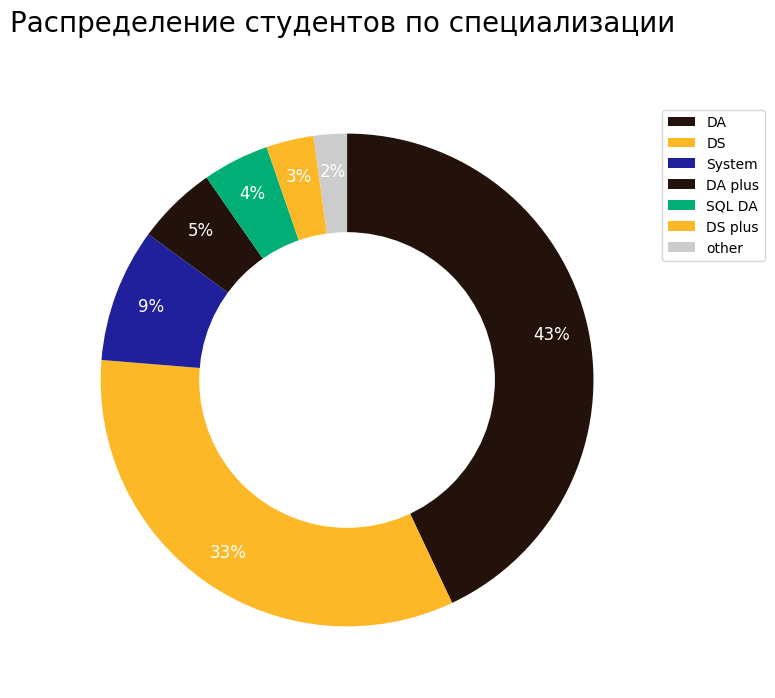

In [ ]:
doughnut (15, 8, prof_plot.iloc[:6, 0].tolist() + [prof_plot['profession_name'].sum()-sum(prof_plot.iloc[:6, 0].tolist())]\
          , ['#23120B','#FDB827','#21209C','#23120B','#01ae76','#FDB827','#cccccc'], 0, 'Распределение студентов по специализации \n' \
          , ['DA','DS','System','DA plus','SQL DA','DS plus','other'], counterclock=False, color='w')

Большинство студентов обучаются на data-analyst и data-scientist. На третьем месте Системные аналитики

### Анализ студентов по сегментам оплаты (B2B, B2C, B2G)

In [ ]:
segments = data.groupby('original_segment').agg({'user_id':'count'}).join(data.groupby('current_segment').agg({'user_id':'count'}),\
                                                                          lsuffix='_orig', rsuffix='_cur')
segments = segments.reset_index().sort_values(by='user_id_orig', ascending=False)

In [ ]:
segments

,original_segment,user_id_orig,user_id_cur
2,b2g,1680,1608
1,b2c,1445,1517
0,b2b,20,20


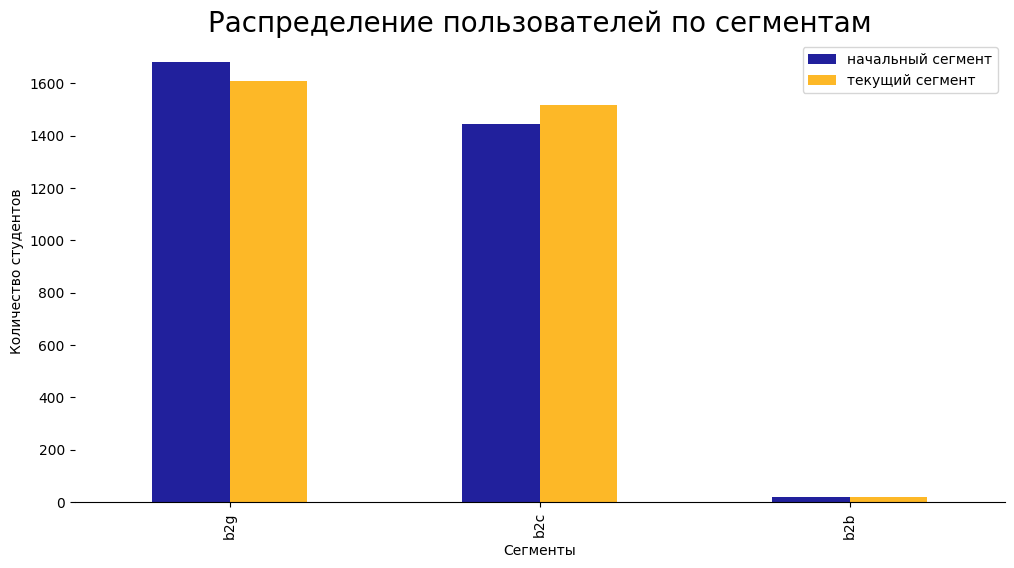

In [ ]:
# визулизируем
ax = segments.plot(x='original_segment', kind='bar', stacked=False,figsize=(12, 6),\
                   color=['#21209C', '#FDB827'])
ax.legend(['начальный сегмент','текущий сегмент'])
sns.despine(top=True, right=True, left=True)
plt.title('Распределение пользователей по сегментам', fontsize=20) 
plt.xlabel('Сегменты')
plt.ylabel('Количество студентов');


Чуть более половины студентов оплачивают обучение с помощью государственных дотаций (1681). На втором месте с небольшим отрывом те, кто учится за свой счет (1445). К окончанию обучения незначительная часть людей (72 чел) перешла с государственного на собственное финансирование, видимо не уложились в сроки обучения.  
Яндексу стоит потратить усилия для привлечения бизнес-клиентов и повышения интереса среди тех, кто готов учиться за свой счет.

### Составление портретов студентов

#### Распределение ответов по пользователям в целом

In [ ]:
user_answer = answers[answers['question']!='Q6.Комментарии']\
                .groupby(['question','user_answer']).size().reset_index(name='nunique')
user_answer['share,%'] = round(user_answer['nunique']*100/user_answer.groupby('question')['nunique'].transform('sum'),1)
user_answer = user_answer.sort_values(['question','share,%'],ascending = [True,False])

Визуализируем

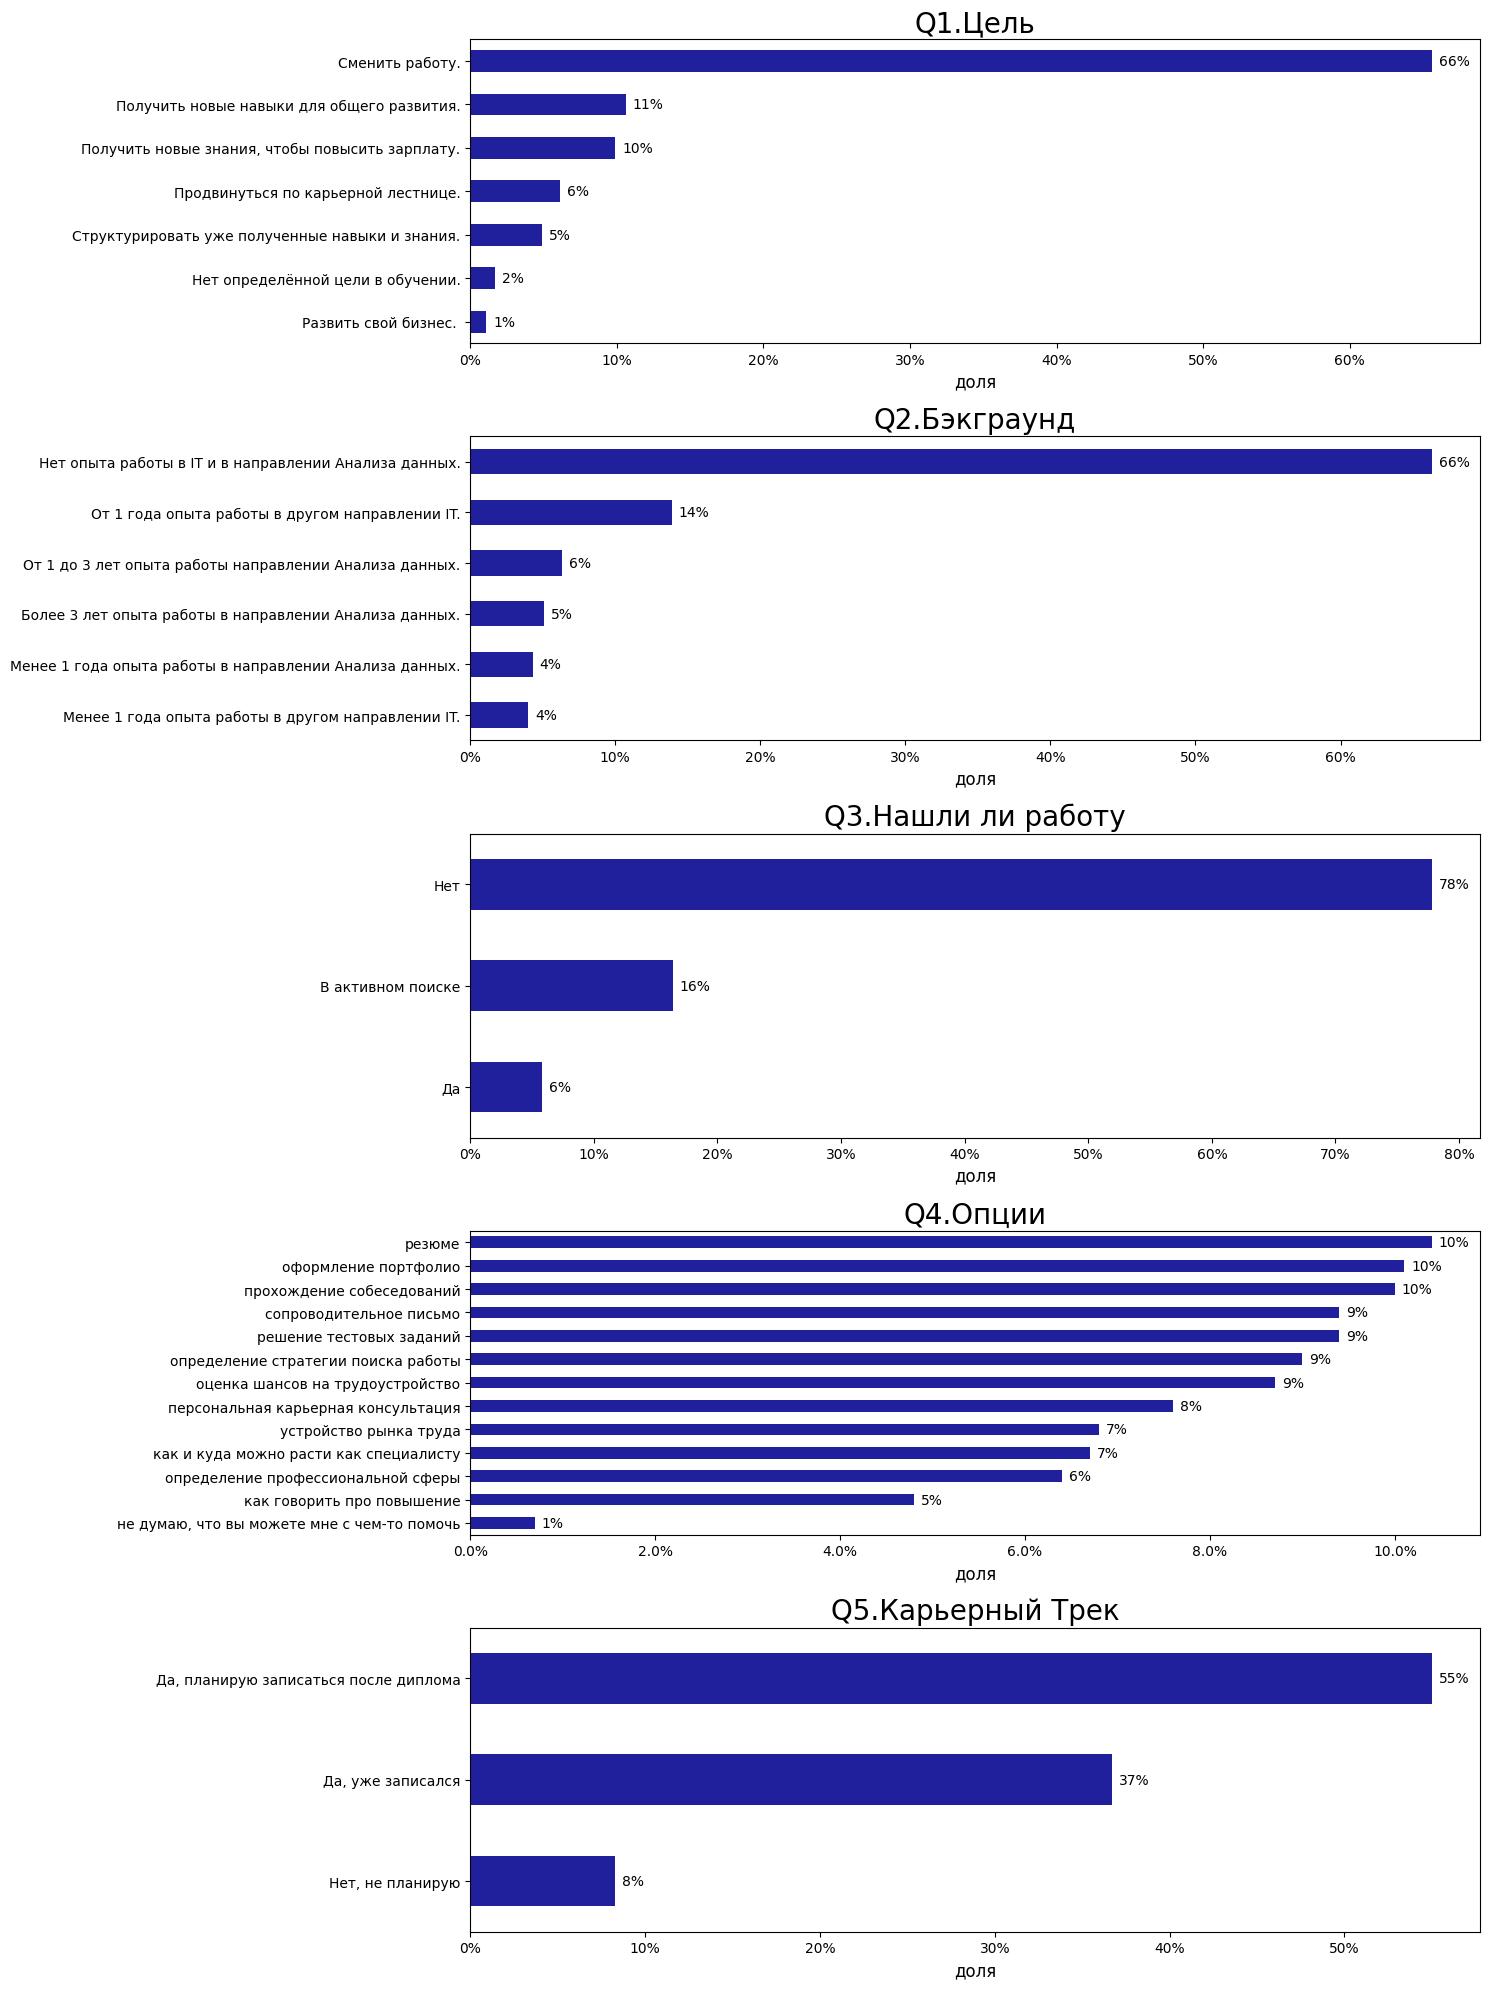

In [ ]:
user_answer = user_answer.sort_values(['question','share,%'],ascending = [True,True])
plt.figure(figsize = (15, 20))
title_set = 0
seria = 1
plt.subplots_adjust(hspace = 0.3)
title = ['Q1.Цель','Q2.Бэкграунд','Q3.Нашли ли работу','Q4.Опции','Q5.Карьерный Трек']
qu=['Q1.Цель','Q2.Бэкграунд','Q3.Нашли ли работу','Q4.Опции','Q5.Карьерный Трек']
for q in qu:
    ax = plt.subplot(5, 1, seria)
    user_answer[user_answer['question']==q][['user_answer','share,%']].set_index('user_answer').plot(kind='barh',ax = ax, color = '#21209C', legend=False)
    plt.xlabel("доля",size = 12)
    plt.ylabel("")
    # процентная шкала
    ax.xaxis.set_major_formatter(mtick.PercentFormatter())
    # подписи данных в процентах
    for p in ax.patches:
      ax.annotate(f"{p.get_width():.{0}f}%", (p.get_width(), p.get_y()+p.get_height()/2),
                    xytext=(5, 0), textcoords='offset points', ha="left", va="center", fontsize=10)
    plt.title(title[title_set], size =20)
    seria +=1
    title_set +=1
plt.tight_layout()
plt.show();

Основная цель студентов – сменить работу
Большинство приходят учиться без опыта работы 
Записываются в карьерный трек во время обучения около 40%, а активно ищут работу я около 20%
Самые востребованные опции карьерного центра: составление резюме, портфолио, навыки прохождения собеседования. Только 1% считает что им не нужна помощь.

#### Распределение ответов по направления обучения

In [ ]:
# создаем словарь пар значений: название столбца - заголовок графика
q_col=data.iloc[:,5:10].columns.tolist()
q_title = ['Цели',
           'Опыт',
           'Нашли работу в процессе обучения',
           'Опции карьерной поддержки',
           'Участие в карьерном треке']
dict_q = dict(zip(q_col,q_title))

--------------------Q1.ЦЕЛЬ ДЛЯ PROFESSION_NAME--------------------


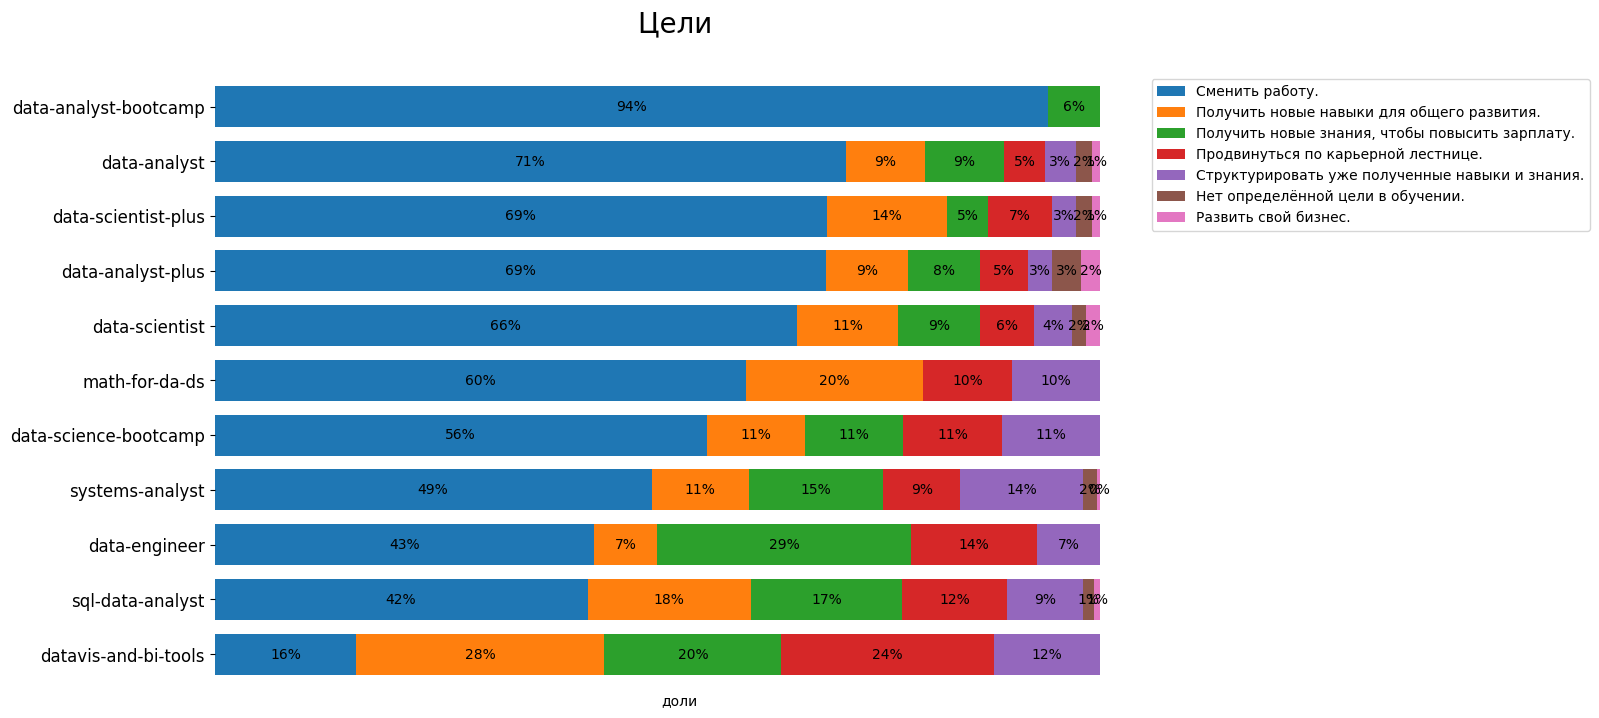

--------------------Q2.БЭКГРАУНД ДЛЯ PROFESSION_NAME--------------------


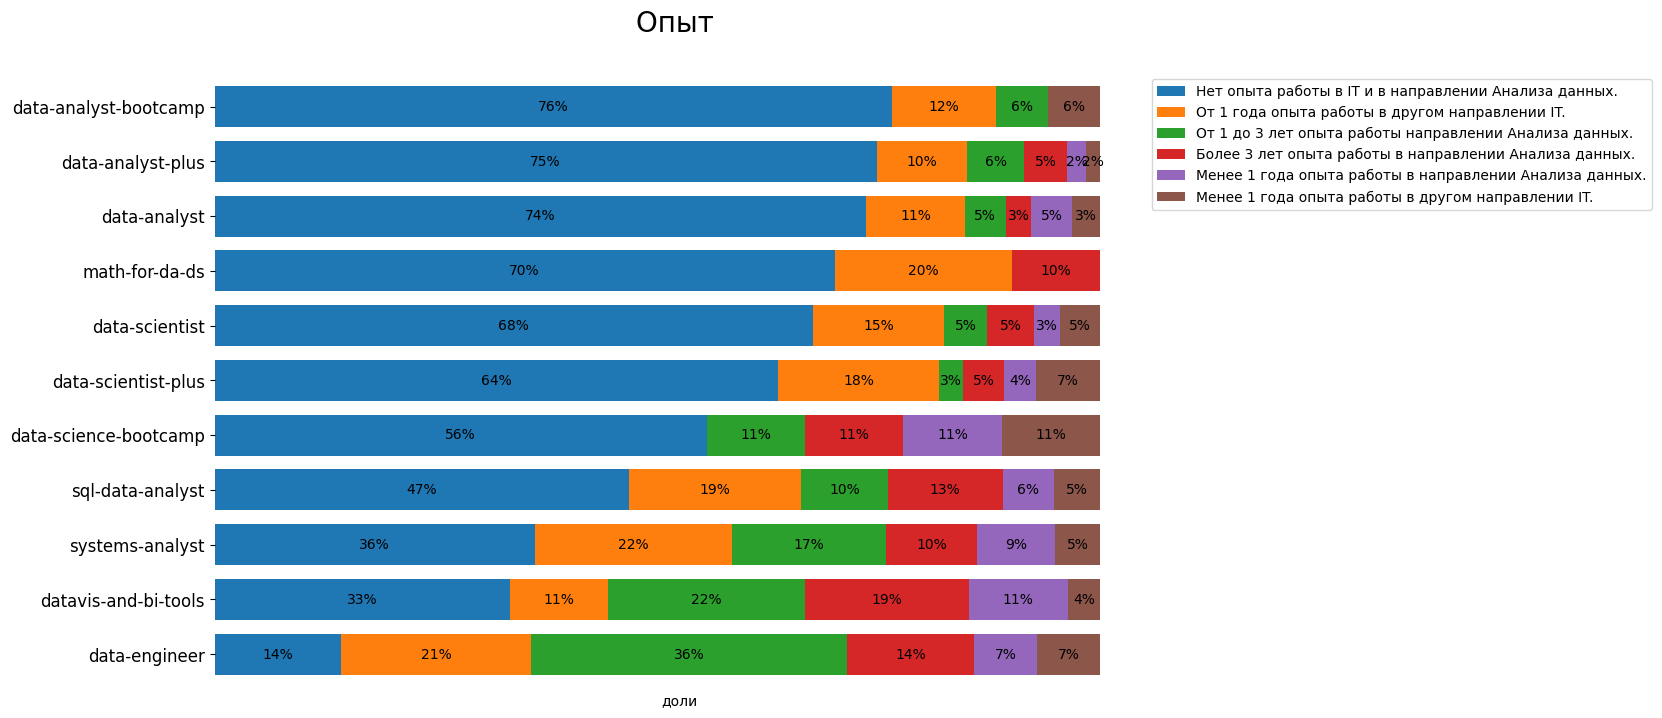

--------------------Q3.НАШЛИ ЛИ РАБОТУ ДЛЯ PROFESSION_NAME--------------------


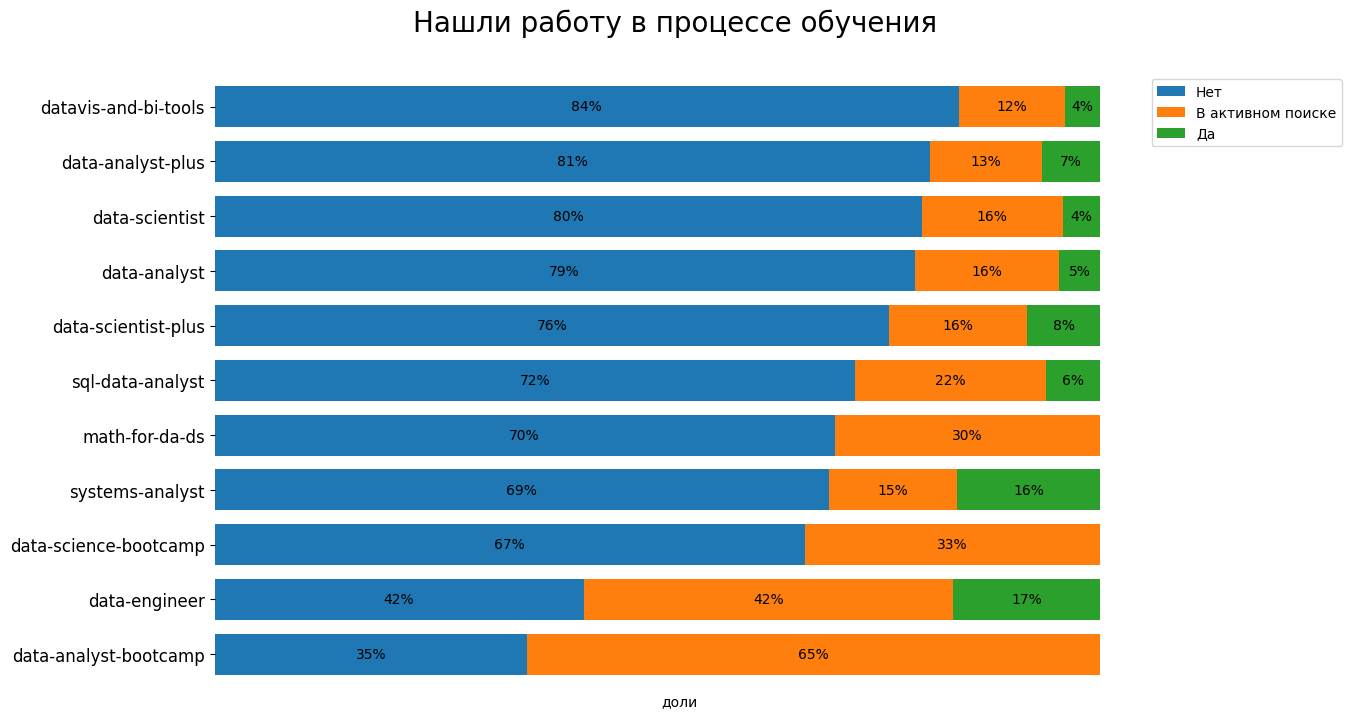

--------------------Q4.ОПЦИИ ДЛЯ PROFESSION_NAME--------------------


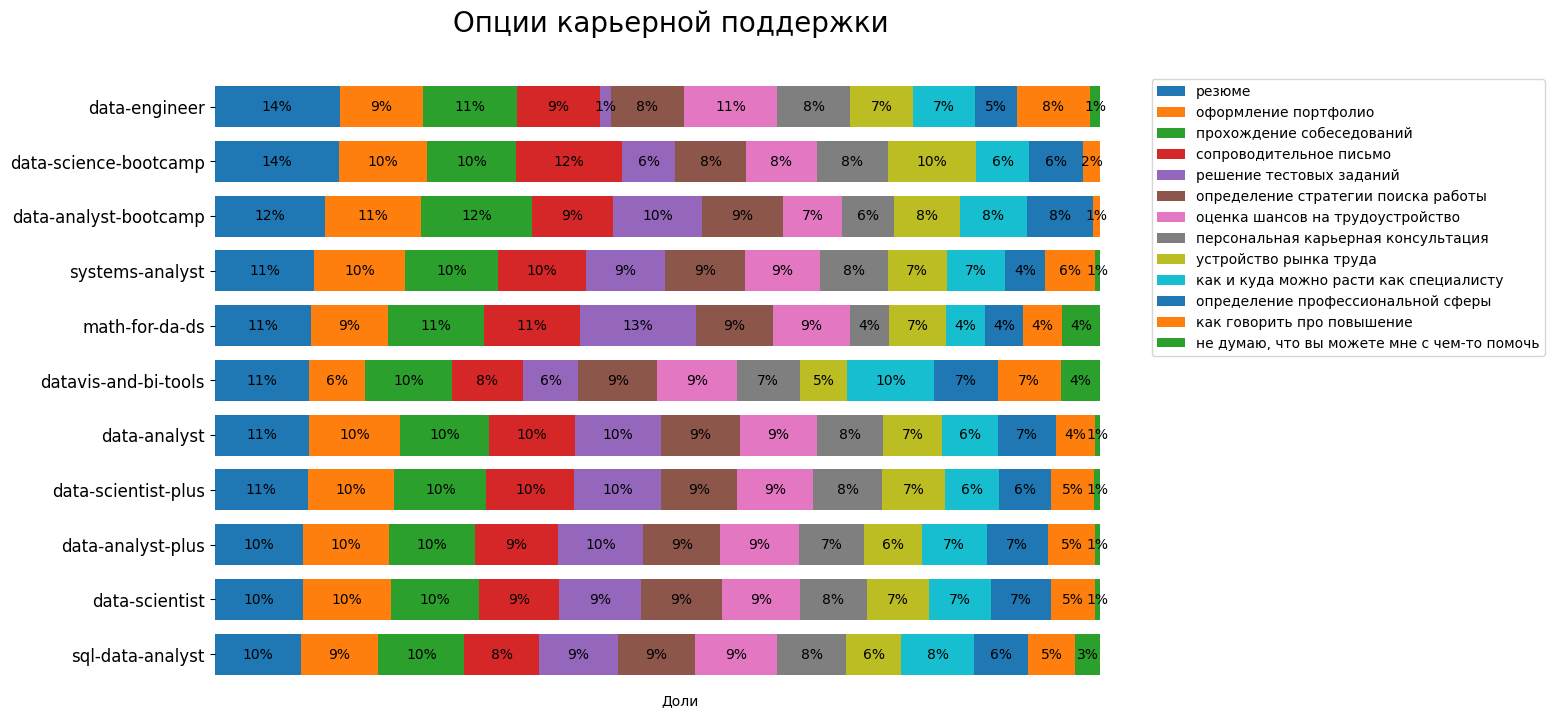

--------------------Q5.КАРЬЕРНЫЙ ТРЕК ДЛЯ PROFESSION_NAME--------------------


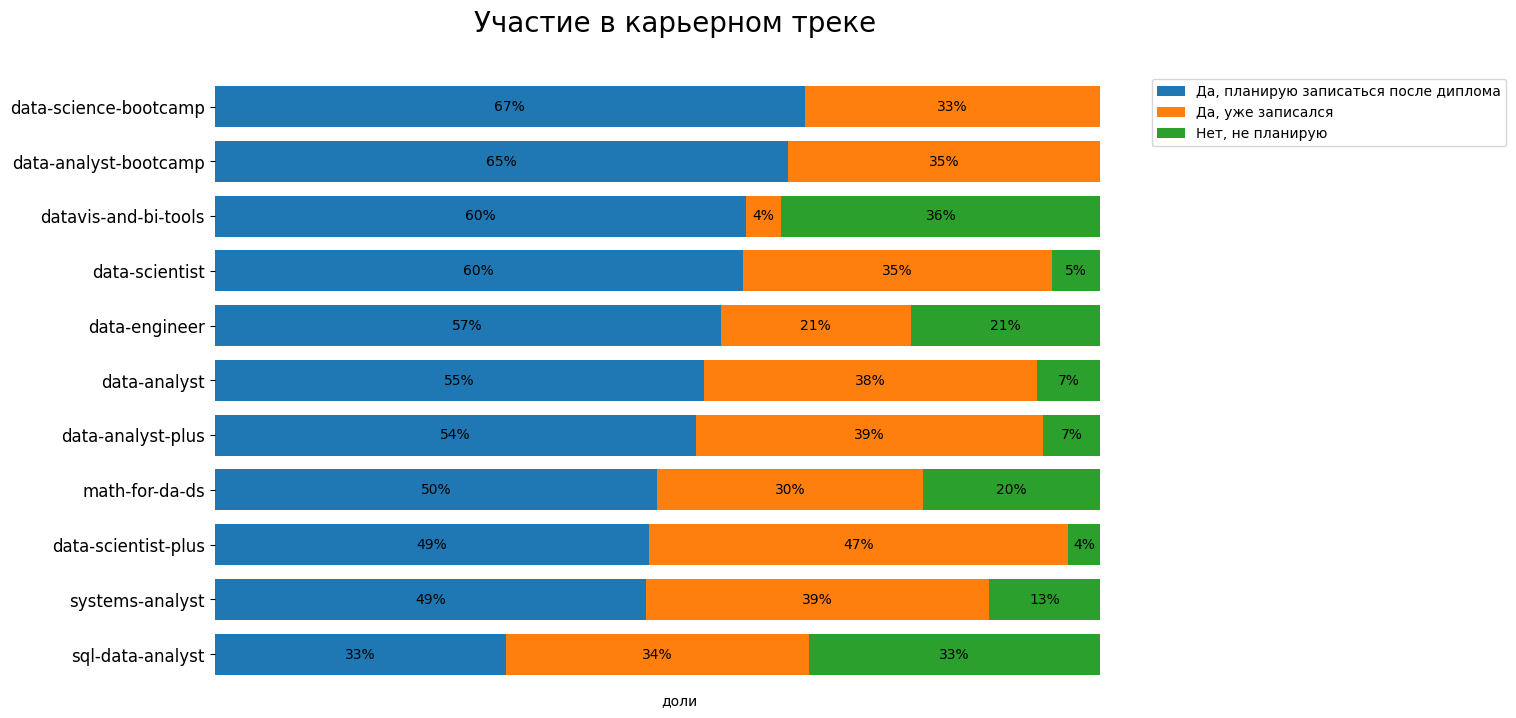

In [ ]:
viz_multiply('profession_name',dict_q,answers_pt,user_answer,answers, 4)



`Аналитик данных`(43% всех студентов) и `Аналитик данных плюс`(5%) в основном выбирают люди, которые хотят сменить область деятельности, но не имеют возможности или потребности делать это в сжатые сроки. Также курс привлекателен для собственников бизнеса и уже работающих в этой или смежной областях людей. Большинство участников ставит перед собой цель смены работы, но есть и те, кто проходит курс для совершенствования на текущем месте.
`Аналитик данных буткемп` (0.5%) выбирают люди, которые в данный момент не имеют постоянной работы и готовы потратить много сил и времени на обучение для трудоустройства.
`Специалист по Data Science`(33%) и`Специалист по Data Science плюс` (3%)выбирают не только люди, которые хотят сменить область деятельности (хоть их больше половины), но и имеющие опыт с целью повысить квалификацию и получить новую работу или должность. Также обучение привлекательно для владельцев бизнеса. Ученики не имеют возможности или потребности получать знания и менять работу в срочном порядке. 
Почти половина людей, выбирающих `Data Science буткемп`(0.3%) уже имеет опыт в IT и ставит целью профессиональный рост и смену работы (видимо в рамках такого роста). Можно предположить что учащиеся должны быть хорошо мотивированы и иметь высокую успеваемость.
`Системный аналитик`(9%) привлекателен для людей с опытом больше, чем для новичков. Значительная часть учащихся ставит целью повышение квалификации. Активно ищут работу всего 15%, что может указывать на то, что большинство имеет работу, но стремится сменить компанию или должность.
 `SQL для работы с данными и аналитикой`(4.4%) выбирают люди, которые работают в аналитике, IT или смежных областях с целью получения новых знаний и опыта. 

`Визуализация данных и введение в BI инструменты`(0.8%) выбирают люди с опытом работы для повышения квалификации. Треть из них не нуждается в помощи с трудоустройством, мало кто активно ищет работу. Интересно, что это самый привлекательный курс для собственников бизнеса.

Курс `Инженер данных` (0.4%)выбирает больше всего людей с опытом в аналитике и других областях IT, что закономерно поскольку он адресован людям с опытом определенными и знаниями. Активно ищут работу в два раза больше людей, чем участвуют в карьерном. Видимо у многих уже есть свой карьерный план. 

`Математика для анализа данных` (0.3%)- дополнительный курс для прокачки имеющихся навыков и знаний. Востребован как новичками, так и специалистами для повышения квалификации.

Часть опросника имеет не совсем точные формулировки:  
**Цель: сменить работу** 
Должна быть разбита на 2 категории:  1- хотят сменить область деятельности (как правило новички), 2 – хотят сменить компанию-работодателя (учатся для повышения квалификации). 

**Нашли работу в процессе обучения: нет**
Должна быть разбита на 2 категории: 1- ищу, но не нашел, 2- не ищу.

**Нашли работу в процессе обучения: да**
Должна быть разбита на 2 категории: 1- искал и нашел (желательно уточнить пригодилось ли обучение), 2- уже трудоустроен и менять не собираюсь.




#### Распределение ответов по сегментам

In [ ]:
cnt_bgr = answers_pt[['profession_name','user_id','Q2.Бэкграунд']].pivot_table(index='profession_name',columns='Q2.Бэкграунд', values='user_id',aggfunc='count')
#cols = cnt_bgr.columns.values
#cnt_bgr_prct[cols] = cnt_bgr_prct[cols].div(cnt_bgr_prct[cols].sum(axis=1), axis=0).multiply(100)
#order = user_answer[user_answer['question']=='Q2.Бэкграунд']['user_answer'][::-1]
#cnt_bgr_prct = cnt_bgr_prct.reindex(columns=order)
#cnt_bgr_prct = cnt_bgr_prct.sort_values(by=cnt_bgr_prct.columns[0])
#display(cnt_bgr_prct)

--------------------Q1.ЦЕЛЬ ДЛЯ ORIGINAL_SEGMENT--------------------


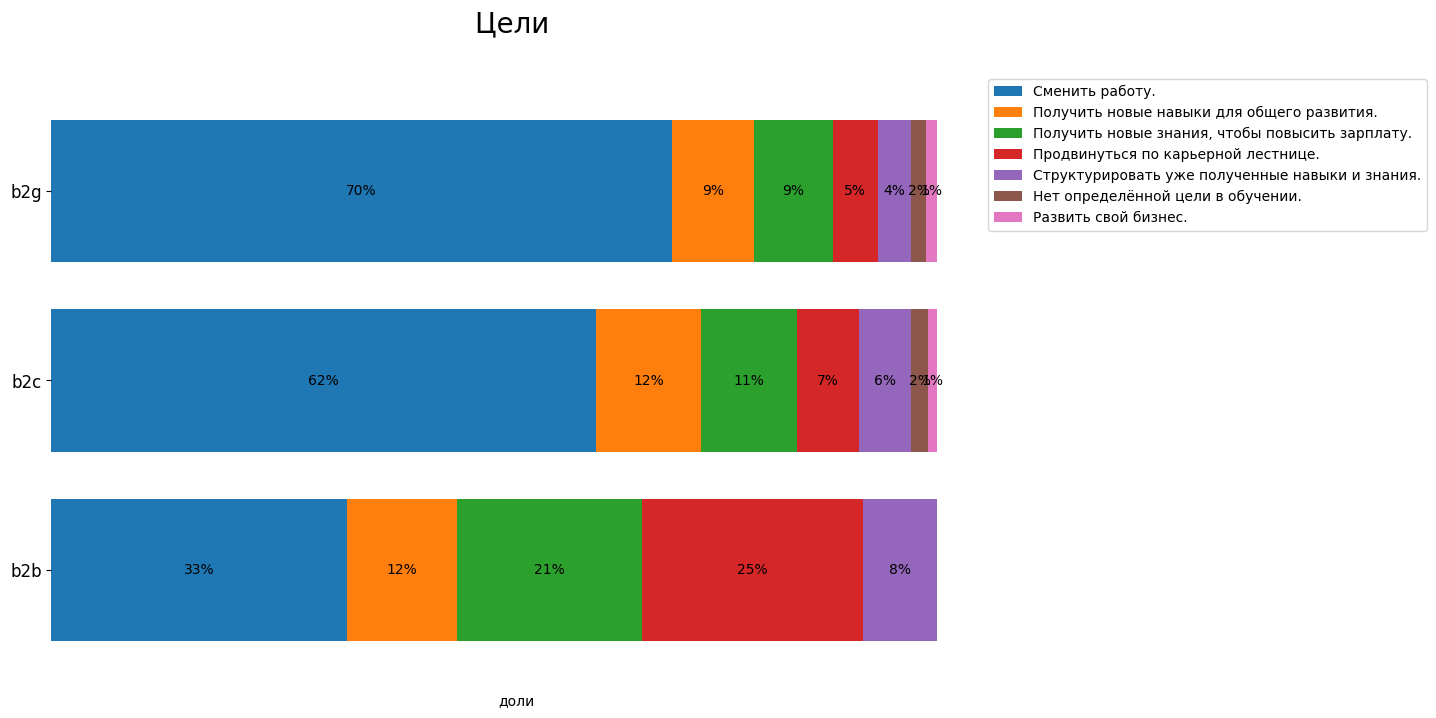

--------------------Q2.БЭКГРАУНД ДЛЯ ORIGINAL_SEGMENT--------------------


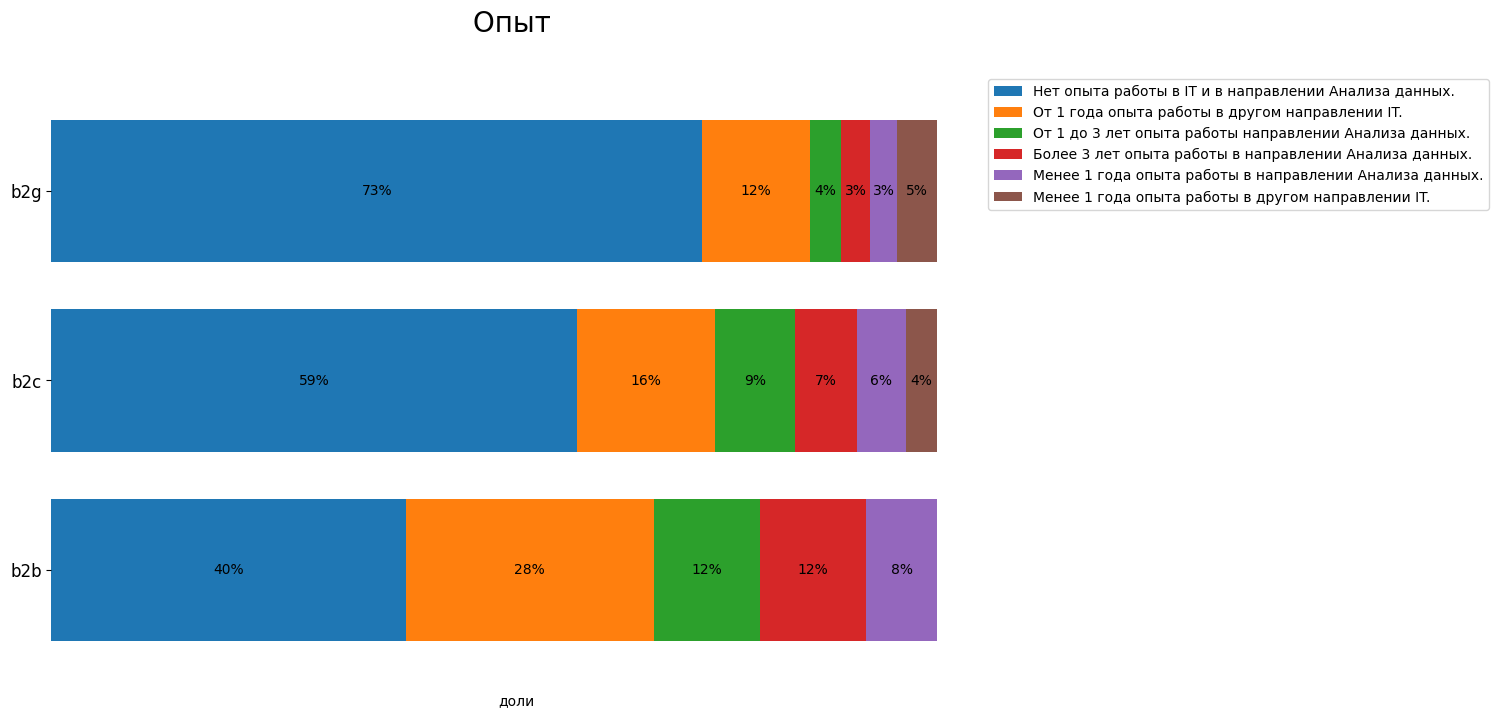

--------------------Q3.НАШЛИ ЛИ РАБОТУ ДЛЯ ORIGINAL_SEGMENT--------------------


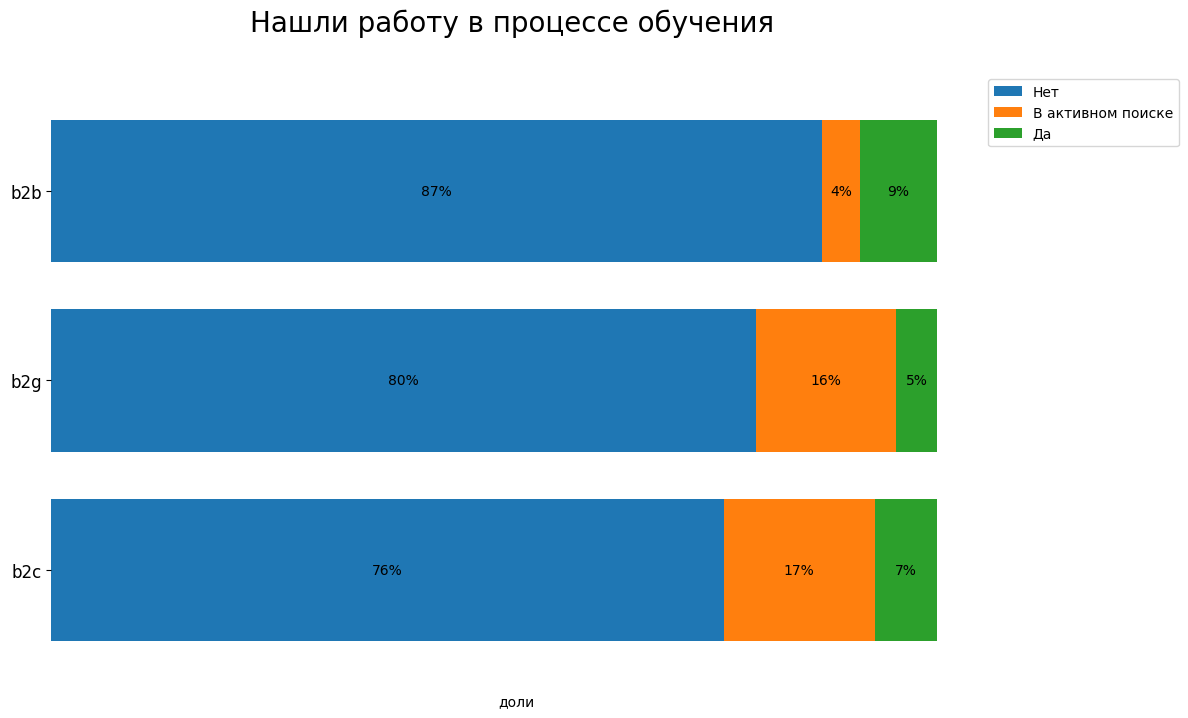

--------------------Q4.ОПЦИИ ДЛЯ ORIGINAL_SEGMENT--------------------


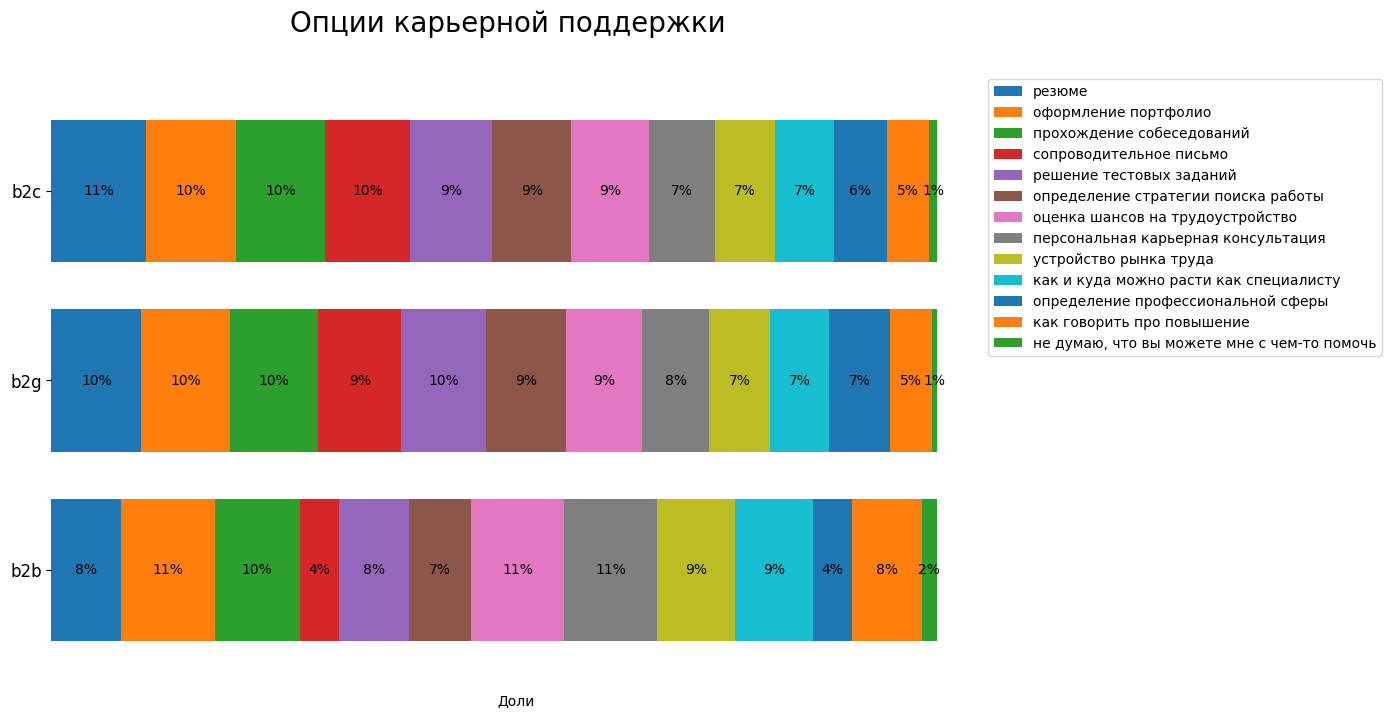

--------------------Q5.КАРЬЕРНЫЙ ТРЕК ДЛЯ ORIGINAL_SEGMENT--------------------


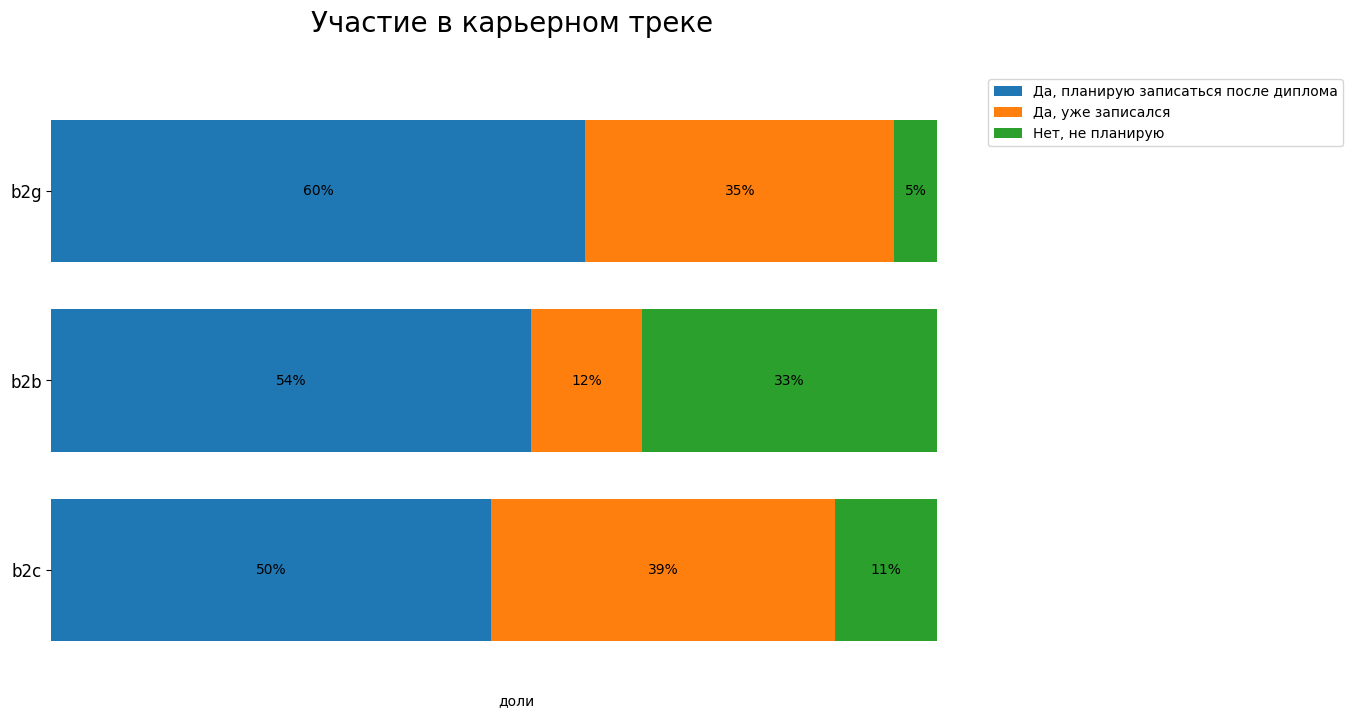

In [ ]:
viz_multiply('original_segment',dict_q,answers_pt,user_answer,answers, 4)

Государственными программами чаще всего пользуются новички (73%) с целью сменить работу (70%). Большая часть (95%) нуждается в помощи в трудоустройстве, треть (35%) записывается в карьерный трек во время обучения.  Имеют опыт в аналитике всего 10%, в других направлениях IT – 17%.  

За свой счет учится больше людей с опытом, чем по государственным программам: 20% работали в других областях IT, 21% работали в аналитике. Цель большинства – сменить работу (62%).  Больше всего пользуются карьерным треком во время обучения (39%).  

За счет бизнеса учатся люди, которые хотят продвинуться по карьерной лестнице или получить повышение зарплаты (46%), улучшить свои знания (20%). Некоторые указали смену работы (33%), 12% записались в карьерный трек, 4% активно ищут работу. Это говорит о том, что в этой группе не только повышающие квалификацию за счет компании. Возможно есть люди, которым удобнее оплачивать учебу от юридического лица (например собственного ИП).  
Также неожиданным кажется что в этой категории никто не выбрал развитие собственного бизнеса (в других категориях по 2%).  Нужно подробнее изучить эту группу для дальнейшего привлечения в Яндекс.


### Зависимость целей от опыта

In [ ]:
goals_bgr = answers_pt.pivot_table(index = 'Q1.Цель', columns='Q2.Бэкграунд',values='user_id',aggfunc='count')
#goals_bgr
goals_bgr_prct = goals_bgr.copy()
cols = goals_bgr_prct.columns.values
goals_bgr_prct[cols] = goals_bgr_prct[cols].div(goals_bgr_prct[cols].sum(axis=1), axis=0).multiply(100)
bgr_goals_prct = goals_bgr.T
cols = bgr_goals_prct.columns.values
bgr_goals_prct[cols] = bgr_goals_prct[cols].div(bgr_goals_prct[cols].sum(axis=1), axis=0)

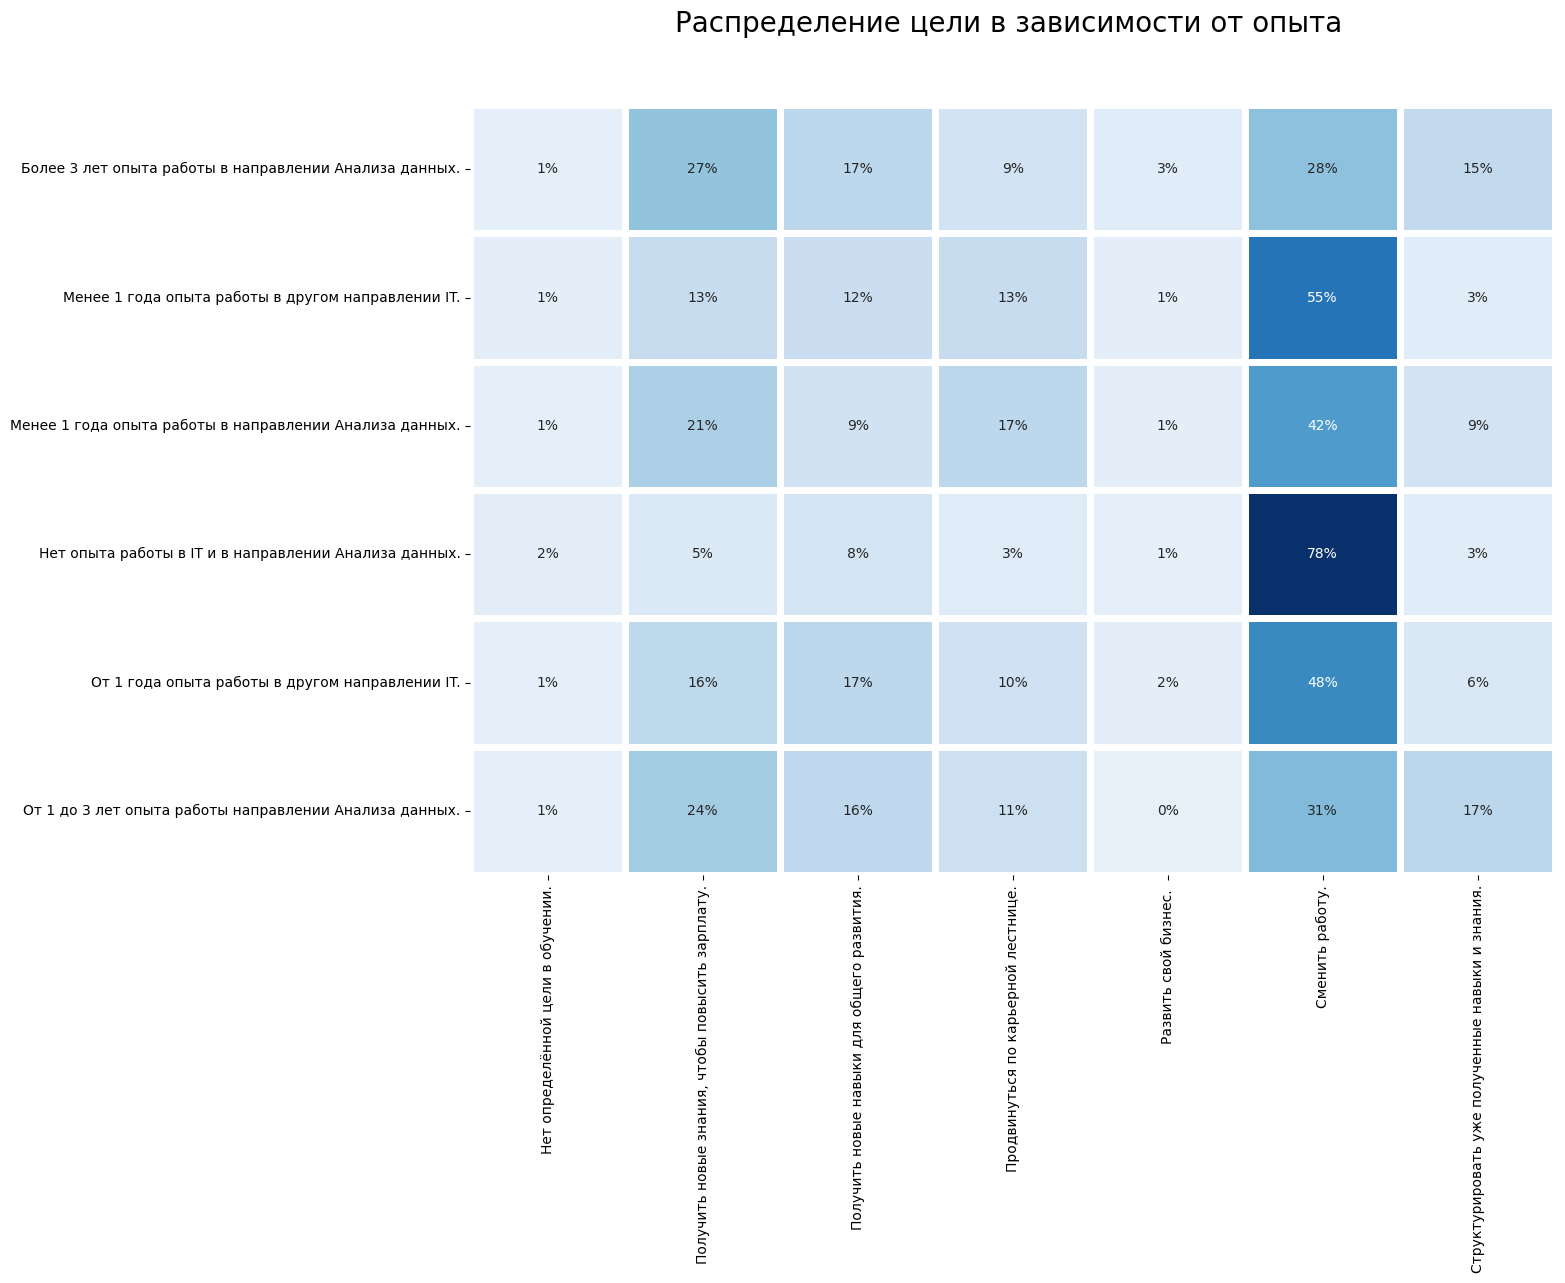

In [ ]:
# визуализируем
heatmapCr(bgr_goals_prct, 'Распределение цели в зависимости от опыта \n', '', '', annot=True,  fmt='.0%', vmin=-0.07,fontsize=20, figsize=(14, 10))

Люди без опыта в IT идут на обучение с основной целью – сменить работу (76%). Видимо имеется в виду смена области деятельности. 
Уже имеющие опыт в анализе данных (независимо от срока) стремятся получить новые знания чтобы повысить зарплату (21% - 27%). С опытом менее 1 года заинтересованы продвинуться по карьерной лестнице (17%) и сменить работу (42%), видимо подразумевая смену работодателя. С опытом более 1 года и более 3 лет  заинтересованы структурировать знания (17% и 15%) и возможно сменить работу (31% и 28%), также видимо подразумевая смену работодателя, а не область деятельности.
Имеющие опыт в других направлениях IT учатся на аналитике чтобы сменить работу (49% - 55%). Они также указывают целями обучения повышение зарплаты (13%-16%), получение новых знаний (12%-16%), продвижение по карьерной лестнице (10% - 12%).
Можно предположить что они изучили на собственном опыте разные специализации IT  и сделали осознанный выбор будущей профессии, решили дальше развиваться в аналитике. 

Судя по данному распределению помощь с карьерой необходима людям без опыта и нужна многим людям с опытом в других направлениях IT и в меньшей мере имеющим опыт в аналитике.



### Зависимость опций карьерной поддержки от опыта

Добавим в таблицу answers сокращенный вариант опыта

In [ ]:
answers['experience'] = answers['user_answer'].map(background)
#справочник user_id - опыт
experience = answers[~answers['experience'].isnull()][['user_id','experience']].drop_duplicates()
#добавим в таблицу answers
answers=answers.join(experience.set_index('user_id'), on='user_id',lsuffix='not')

In [ ]:
help = answers[answers['question']=='Q4.Опции'].pivot_table(index='user_answer',columns='experience',values='user_id',aggfunc='count')

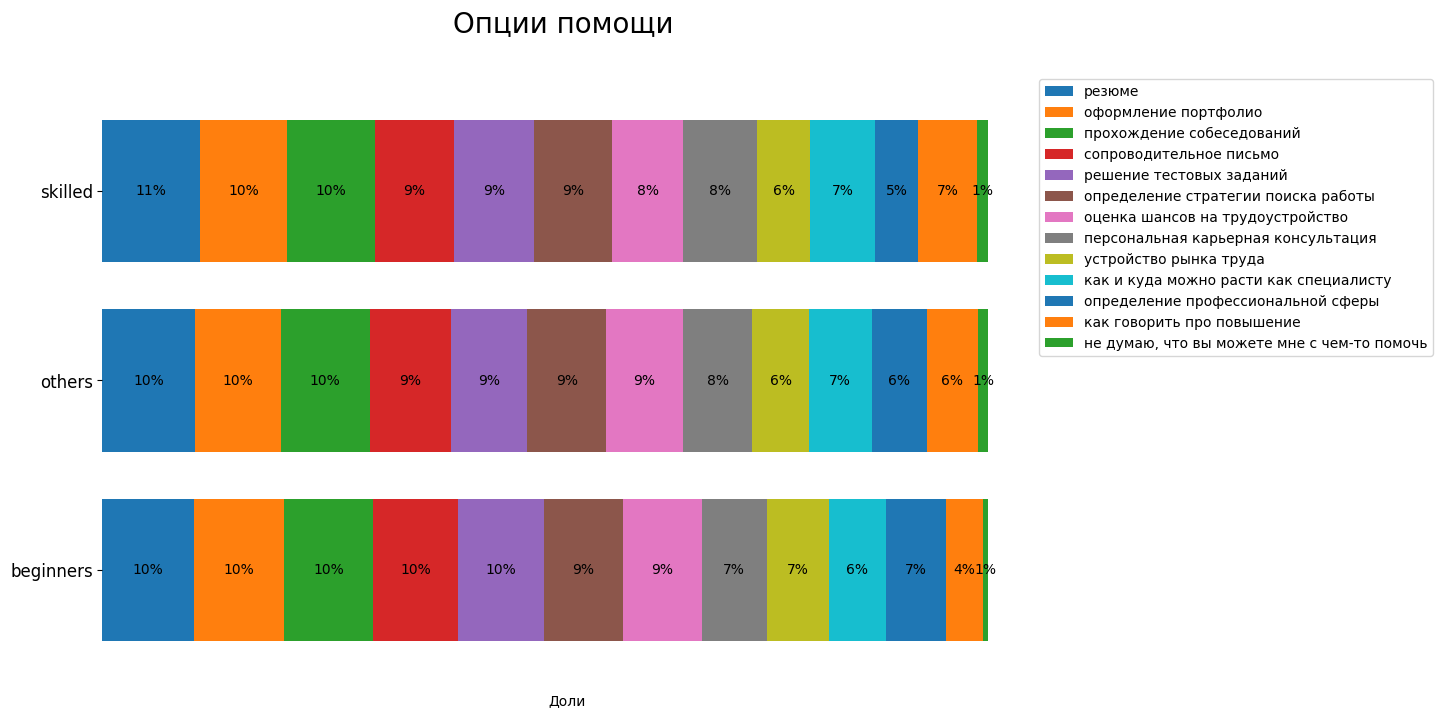

In [ ]:
help_prct = help.copy().T
cols = help_prct .columns.values
help_prct[cols] = help_prct[cols].div(help_prct[cols].sum(axis=1), axis=0).multiply(100)
order = user_answer[user_answer['question']=='Q4.Опции']['user_answer'][::-1]
help_prct = help_prct.reindex(columns=order)
help_prct = help_prct.sort_values(by=help_prct.columns[0])
#визуализируем
barh (help_prct, 12, 8, 'Опции помощи \n', 'Доли', '', 1, 1, 1, 1, 0,perc_frmt= 1, legend=1, legend_text=order)

При составлении портрета пользователей мы рассмотрели распределение опций помощи карьерного центра по направлениям обучения и не нашли зависимостей. Было предположение что эти опции могут зависеть от опыта работы.  
Запросы отличаются мало,все опции востребованы примерно одинаково.  Самыми важными для всех являются навыки самопрезентации: составление резюме, оформление портфолио,  прохождение собеседований.
Одинаково важным все считают изучение рынка труда и своей ниши в нем: определение стратегии поиска, оценка шансов, персональная консультация.
Определение профессиональной сферы больше волнует новичков, в меньшей степени опытных специалистов.
Как говорить про повышение интересует специалистов больше, чем новичков.
Только 1% в каждой группе считает, что помощь не нужна. 
Можно сделать вывод, что все опции помощи карьерного центра одинаково важны всем обучающимся, независимо от выбранной специальности и опыта работы. 


### Анализ пользователей по уровням  learning performance и уверенности в знаниях content

#### Анализ пользователей по learning performance

Посмотрим распределение метрик по данным полученным из таблицы метрики, тк там содержится больше студентов и картина будет более полной

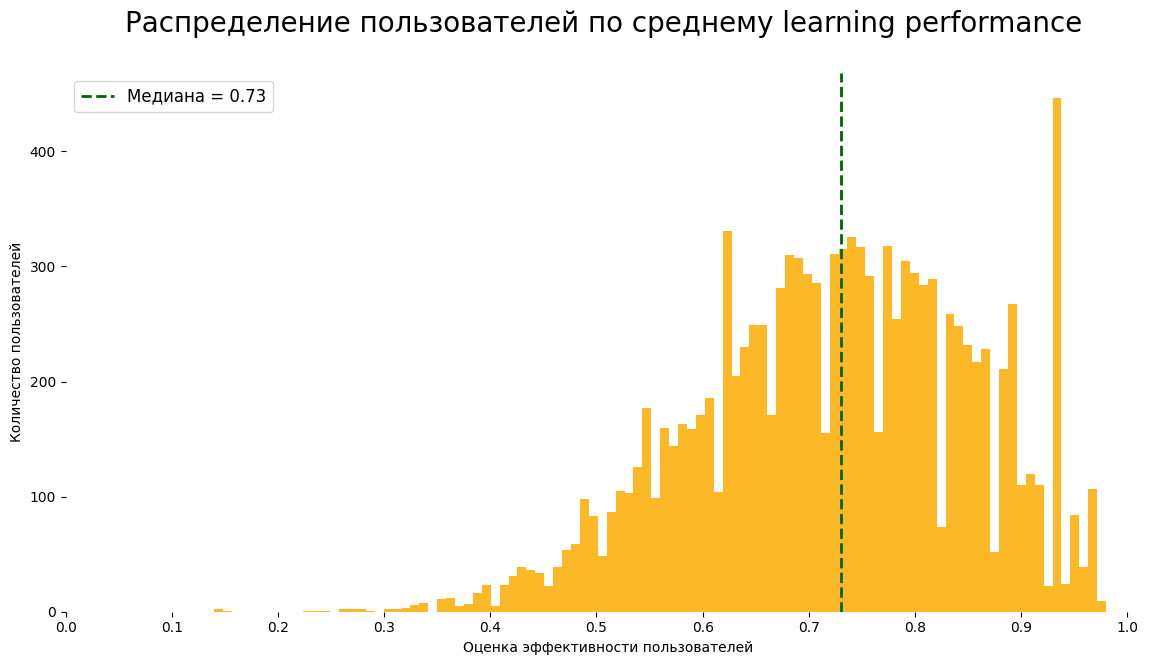

In [ ]:
median = round(metrics_u['learn_perf_avg'].median(), 2)
plt.figure(figsize=(14, 7))
ax = plt.subplot(1, 1, 1)
hist = plt.hist(metrics_u['learn_perf_avg'], bins=100, color='#FDB827')
plt.title('Распределение пользователей по среднему learning performance \n ', fontsize=20)
plt.xlabel('Оценка эффективности пользователей')
plt.ylabel('Количество пользователей')
plt.xticks(np.arange(0,1.01, 0.1))
sns.despine(top=True, right=True, left=True, bottom=True) 
ax.axvline(median, linewidth=2, color='darkgreen', linestyle='--', label = 'Медиана = {:,.2f}'.format(median))
plt.legend(fontsize="12")
plt.show;

Эффективность большинства студентов 0,7-0,8  
Выделяется выброс на уровне между 0,9 - 1  
Посмотри что это за оценки:

In [ ]:
metrics_u[metrics_u['learn_perf_avg']>0.9]['profession_name'].value_counts()

systems-analyst          380
sql-data-analyst         325
data-scientist            97
data-analyst              61
data-engineer             52
data-scientist-plus       26
data-science-bootcamp     11
data-analyst-plus         10
data-analyst-bootcamp      7
math-for-da-ds             3
Name: profession_name, dtype: int64

Такие высоки оценки демонстрирую только systems-analyst и sql-data-analyst направления  
Стоит проверить почему только данные направления оценены так высоко. Возможо стоит посмотреть данные за другой период


Для целей нашего исследования, предварительно разделим пользователей на две группы библиотекой jenkspy

In [ ]:
lp_breaks = jenkspy.jenks_breaks(metrics_u['learn_perf_avg'], 2)
lp_breaks

[0.14, 0.713, 0.98]

Граница получилась чуть ниже медианы, что подходит нам тк медиана немного завышена из-за высоких оценок системных аналитиков и sql аналитиков

#### Анализ пользователей по уверенности в знаниях

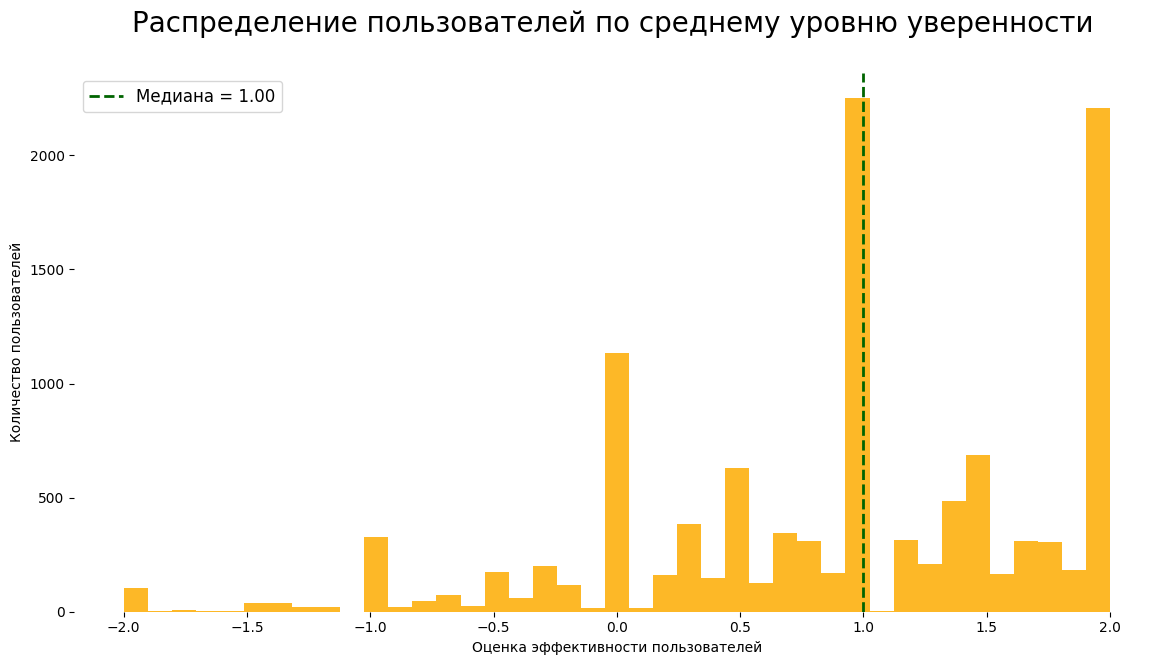

In [ ]:
median = round(metrics_u['content_avg'].median(), 2)
plt.figure(figsize=(14, 7))
ax = plt.subplot(1, 1, 1)
hist = plt.hist(metrics_u['content_avg'], bins=41, color='#FDB827')
plt.title('Распределение пользователей по среднему уровню уверенности \n ', fontsize=20)
plt.xlabel('Оценка эффективности пользователей')
plt.ylabel('Количество пользователей')
sns.despine(top=True, right=True, left=True, bottom=True) 
ax.axvline(median, linewidth=2, color='darkgreen', linestyle='--', label = 'Медиана = {:,.2f}'.format(median))
plt.legend(fontsize="12")
plt.show;

Большинство студентов оценивает свою уверенность в знаниях на 1-2 пункта по шкале от -2 до 2

Для целей нашего исследования, предварительно разделим пользователей на две группы - по значению больше или равно 1, как скорее уверенных в себе пользователей, и менее 1, как менее уверенных в себе пользователей

In [ ]:
с_breaks = [metrics_u['content_avg'].min(), metrics_u['content_avg'].median()-0.01, metrics_u['content_avg'].max()]
с_breaks

[-2.0, 0.99, 2.0]

#### Корреляция между learning performance и уверенностью студента в знаниях

Проверим корреляцию между эффективностью и уверенностью в знаниях

Коэффициент Пирсона 0.07559779569781101


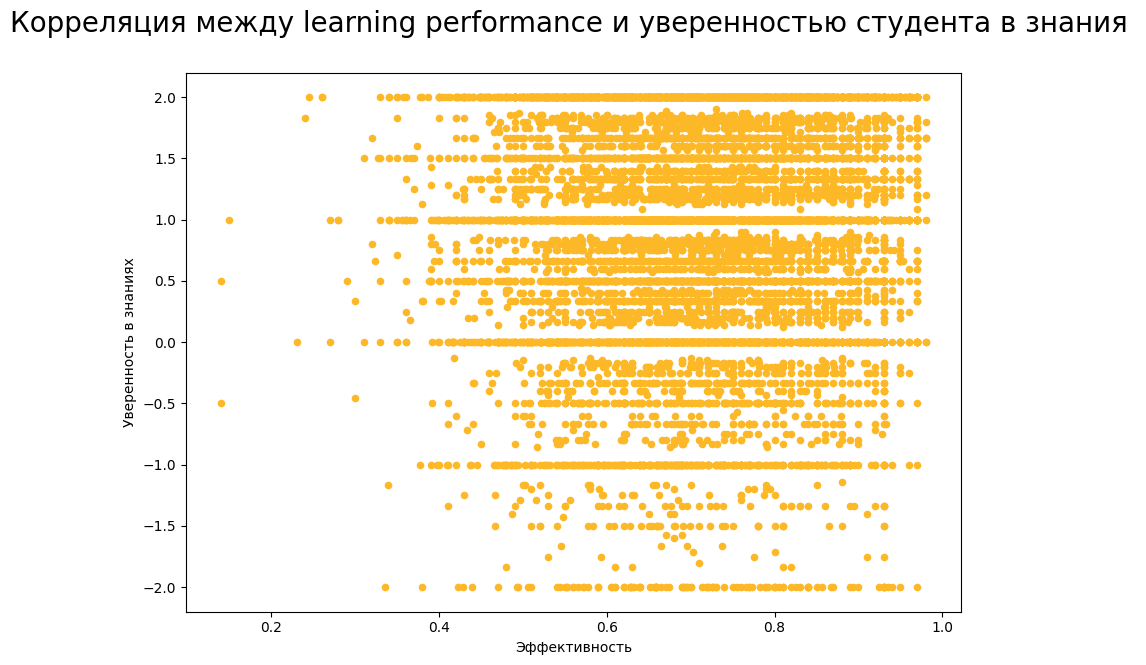

In [ ]:
metrics_u.plot(x='learn_perf_avg',y='content_avg', kind='scatter', color='#FDB827',figsize = (10,7))
plt.title('Корреляция между learning performance и уверенностью студента в знания \n ', fontsize=20)
plt.xlabel('Эффективность')
plt.ylabel('Уверенность в знаниях')                                                                               
print("Коэффициент Пирсона", metrics_u['learn_perf_avg'].corr(metrics_u['content_avg']));                                                                                

Корреляции нет.  
Проверим есть ли корреляция внутри направлений профессий

In [ ]:
name_l = []
corr_l = []
for uniq in data['profession_name'].unique():
  name_l.append(uniq)
  data_segment = metrics[metrics['profession_name'] ==uniq]
  g = data_segment['value'].corr(data_segment['lp_avg_user'])
  corr_l.append(g)
df_corr = pd.DataFrame({
    'Профессии' : name_l,
    'Корреляция' : corr_l
})
df_corr.sort_values('Корреляция',ascending=False).style.background_gradient(cmap='coolwarm')

,Профессии,Корреляция
9,data-science-bootcamp,0.061533
1,data-scientist,0.051590
7,math-for-da-ds,0.049771
2,data-analyst-plus,0.032173
0,data-analyst,0.020558
3,systems-analyst,0.017435
4,data-scientist-plus,0.017168
5,sql-data-analyst,-0.013740
6,data-engineer,-0.018792
8,data-analyst-bootcamp,-0.024702


По направлениям обучения корреляции также нет

### Зависимость уровня знаний и уверенности студента от опыта и целей

Посмотрим как распределяются показатели эффективности и уверенности в знаниях по ответам на заданные студентам вопросы:

In [ ]:
data_melt = data.melt(id_vars=['user_id', 'profession_name','learn_perf_avg','content_avg'], 
                                               value_vars=['Q1.Цель','Q2.Бэкграунд','Q3.Нашли ли работу','Q5.Карьерный Трек'])
data_melt=data_melt.rename(columns={'variable':'Q','value':'A'})
scores_avg = data_melt.groupby(['Q','A']).agg({'learn_perf_avg':'mean','content_avg':'mean'}).reset_index()

In [ ]:
#визуализируем
 
scores_avg.columns = scores_avg.columns.map(''.join)
fig, ax = plt.subplots(nrows= 2, ncols= 2, figsize=(18, 18))
place = 1
for q in scores_avg['Q'].unique():
    plt.subplot(2,2,place)
    score_q = scores_avg[scores_avg['Q'] == q]
    tidy =score_q.drop('Q', axis=1)
    tidy = tidy.melt(id_vars='A').rename(columns=str.title).sort_values('Value', ascending=False)
    sns.barplot(x='A', hue='Variable', y='Value', data=tidy, palette='muted')
    plt.xticks(rotation=90)
    plt.xlabel('Ответы')
    plt.ylabel('Числовая оценка PL и content')  
    plt.title(q)
    plt.tight_layout()
    plt.legend(fontsize="10")
    plt.ylim(bottom=0.2)
    place +=1

plt.show()

 
У тех, кто пришел **структурировать знания** – самая **высокая эффективность** и самый **высокий уровень уверенности** в знаниях, самые низкие показатели у студентов без определенной цели в обучении  
У студентов с опытом от **1 до 3** лет самый **высокий уровень уверенности** в знаниях, но **самые эффективные** с опытом **более 3 лет**, а уверенности у них наоборот **минимальная**  
У те, кто **нашел работу** самый **высокий уровень эффективности**, а самые уверенныые еще в активном поиске  
Самые **уверенные** студенты уже записались на карьерный трек


## Формирование сегментов в зависимости от уровня знаний и уверенности студента в себе

Добавим по установленным ранее границам для уровней learning perfomance и уверенности content столбцы с рейтингами

In [ ]:
# рейтинги по установленным границам каждого параметра
data['lp_score'] = pd.cut(data['learn_perf_avg'], bins=lp_breaks, labels=[2, 1], include_lowest=True)
data['content_score'] = pd.cut(data['content_avg'], bins=с_breaks, labels=[2, 1], include_lowest=True)
# общий рейтинг
data['pc_score'] = data['lp_score'].astype(str) + data['content_score'].astype(str)

Присвоим названия нашим сегментам

In [ ]:
conditions = [
    (data['pc_score']=='11'),
    (data['pc_score']=='12'),
    (data['pc_score']=='21'),
    (data['pc_score']=='22')
    ]
values = ['Cluster_1','Cluster_2','Cluster_3 ','Cluster_4 ']
data['cluster'] = np.select(conditions, values)

**Визуализируем количество студентов в каждом сегменте**

In [ ]:
# визуализируем
data_plot = data['cluster'].value_counts().to_frame()
barchart (14, 7, data_plot, data_plot.index, 'cluster', ['#FDB827'], 
             'Распределение сегментов по количеству студентов \n', 'Сегменты', 'Количество учащихся', 1, 1, 1, 0, 
                0, horizont=0, set_xticks=1)

In [ ]:
mean_metrics = data.pivot_table(index='pc_score', values=['learn_perf_avg','content_avg'], aggfunc='mean').round(2)

**Описание сегментов**

|Сегмент    | Расшифровка  | learn_perf_avg|content_avg |
|----------|----------|------------------|---------------|
| Cluster_1 - 11    |  Эффективные, уверенные в себе   | 0,83|1,51|
| Cluster_2 - 12    |  Эффективные, неуверенные в себе   | 0,81|0,16|
| Cluster_3 - 21    |  Неэффективные, уверенные в себе    |0,62|1,49|
| Cluster_4 - 22    | Неэффективные, неуверенные в себе    |0,62|0,05|

Самая крупная категория ~ 30% демонстрирует высокую эффективность и уверенность в себе   
Самая малочисленная ~ 20% - эффективные, но неуверенные в себе студенты

### Проверка статистических гипотез

**Сравним уровень learn_perfomance между нашими когортами студентов**  


Для выбора теста проверим данные на нормальность по Критерию Шапиро-Уилка. 

In [ ]:
alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(data['learn_perf_avg'])
p_value = results[1]  #- p-value

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

Распределение ненормально, сравнение величин будем проводить тестом Уилкоксона-Манна-Уитни  

Так как в нашем тесте более, чем две группы и несколько сравнений, увеличивается вероятность получить ошибку первого рода(найти разницу там где ее нет).  
Необходимо скорректировать уровень значимости.  
Воспользуемся методом Холма.

Сравнение всех групп по показателю `learn_perf_avg`

In [ ]:
test_p = []
test_name = []
test_mwu_update('learn_perf_avg', test_p,test_name)

In [ ]:
# названия сравнений-гипотез
test_name

In [ ]:

# последовательность p-value
test_p

In [ ]:
# сгененируем последовательность скорректированных yровней значимости
alpha_cor = []
for m in [i for i in range(len(test_p), 0, -1)]:
    alpha_cor.append(0.05/m)
display(alpha_cor) 

In [ ]:
#создадим датафрейм из p_value и добавим номер гипотезы
number_of_hyp = np.arange(1, len(test_p)+1).tolist()
check_hyp = pd.DataFrame({'hyp_names':test_name,  'p_value': test_p},index=number_of_hyp)
#отсортируем от самого низкого значения p_value
check_hyp.sort_values(by = 'p_value',inplace=True)
#добавим alpha
check_hyp['alpha'] = alpha_cor
#добавим столбец с проверкой, если p_value больше alpha, то Истина
check_hyp['p_value_more_alpha'] = np.where(check_hyp['p_value']>= check_hyp['alpha'], True, False)
check_hyp['hyp_check_accepted'] = np.where(check_hyp['p_value_more_alpha']==0, 'P1','P0')
display(check_hyp)

Отклоняем нулевые гипотезы до последней проверки.  
Между группами gr_11_gr_12,	gr_11_gr_22	, gr_12_gr_21, gr_12_gr_22, gr_11_gr_21 есть статистически значимая разница.  
Между группами gr_21_gr_22 статистически значимого отличия нет.

**Сравним уровень уверенности content между нашими когортами студентов**  


Проверим отличается ли уровень уверенности content между когортами.  
Проверка данных на нормальность:

In [ ]:
alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(data['content_avg'])
p_value = results[
    1
]  # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально')

Сравнение всех групп по показателю `content_avg`

In [ ]:
test_p = []
test_name = []
test_mwu_update('content_avg', test_p,test_name)

In [ ]:
test_name

In [ ]:
test_p

In [ ]:
#создадим датафрейм из p_value и добавим номер гипотезы
content_hyp = pd.DataFrame({'hyp_names':test_name,  'p_value': test_p},index=number_of_hyp)
#отсортируем от самого низкого значения p_value
content_hyp.sort_values(by = 'p_value',inplace=True)
#добавим alpha
content_hyp['alpha'] = alpha_cor
#добавим столбец с проверкой, если p_value больше alpha, то Истина
content_hyp['p_value_more_alpha'] = np.where(content_hyp['p_value']>= content_hyp['alpha'], True, False)
content_hyp['hyp_content_accepted'] = np.where(content_hyp['p_value_more_alpha']==0, 'P1','P0')
display(content_hyp)


Отклоняем нулевые гипотезы до последней проверки.  
Между группами gr_11_gr_12,	gr_11_gr_22	, gr_12_gr_21, gr_12_gr_22, gr_21_gr_22 есть статистически значимая разница.  
Между группами gr_11_gr_21 статистически значимого отличия нет.


Объединим данные

In [ ]:
hyp_output = check_hyp.join(content_hyp[['hyp_content_accepted']])
hyp_output = hyp_output[['hyp_names','hyp_check_accepted','hyp_content_accepted']]
hyp_output['result'] = np.where(
    (hyp_output['hyp_check_accepted']=='P0') & (hyp_output['hyp_content_accepted']=='P0'), 
    'Когорты не отличаются между собой', 'Когорты отличаются между собой по одному или двум признакам')
hyp_output

Между всеми сегментами есть различия по одному или двум признакам.  Оставляем границы в обозначенных уровнях.

### Распределение направлений обучения среди выделенных сегментов

In [ ]:
profession = data.pivot_table(index='profession_name', columns='cluster',values='user_id', aggfunc='nunique')
profession_prct = profession.copy()
cols = profession_prct .columns.values
profession_prct[cols] = profession_prct[cols].div(profession_prct[cols].sum(axis=1), axis=0).fillna(0)
profession_prct =profession_prct.sort_values('Cluster_1', ascending=False)
heatmapCr(profession_prct, 'Распределение студентов разных профессий по сегментам', 'Сегменты', 'Профессии', \
          fontsize=20, fmt='.0%', vmin=-0.005)

Максимальную эффективность показывают студенты, обучающиеся на направлениях «Системный аналитик» и «Дата инженер». Большинство студентов уже имеют аналогичный опыт работы, возможно им нужно предложить более сложный материал.

Самая низкая эффективность и уверенность у студентов направлений «Аналитик данных» и «Специалист по Data Science» которые выбирают в основном новички. Возможно курсы требуют более подробного изложения материала или большей поддержки наставников.

60% неэффективных в себе студентов на курсе «Математика для анализа данных и Data Science». Возможно курс сложен для понимания и требует доработки.

### Распределение разного вида опыта среди выделенных сегментов

Сократим количество опций для разновидностей опыта

In [ ]:
background = {
    'Нет опыта работы в IT и в направлении Анализа данных.': 'beginners',
    'От 1 года опыта работы в другом направлении IT.': 'others',
    'Более 3 лет опыта работы в направлении Анализа данных.': 'skilled',
    'От 1 до 3 лет опыта работы направлении Анализа данных.': 'skilled',
    'Менее 1 года опыта работы в другом направлении IT.': 'others',
    'Менее 1 года опыта работы в направлении Анализа данных.':'skilled'
}


In [ ]:
data['background'] = data['Q2.Бэкграунд'].map(background)

Посмотрим как распределяется опыт внутри наших сегментов студентов

In [ ]:
background = data.pivot_table(index='background', columns='cluster',values='user_id', aggfunc='nunique')
background_prct = background.copy()
cols = background_prct .columns.values
background_prct[cols] = background_prct[cols].div(background_prct[cols].sum(axis=1), axis=0)
background_prct =background_prct.sort_values('Cluster_1', ascending=False)
heatmapCr(background_prct, 'Распределение студентов с разным опытом по сегментам', 'Сегменты', 'Опыт', fontsize=20, \
          fmt='.0%', vmin=0.155)

Самые опытные студенты действительно демонстрируют высокую эффективность а также уверены в своих знаниях.  
Среди начинающих высокая доля тех кто обладает низкой эффективностью, но уверен в своих знаниях.  
Среди студентов с опытом в других направлниях IT никто не выделяется

### Распределение вариантов карьерной поддержки среди выделенных сегментов

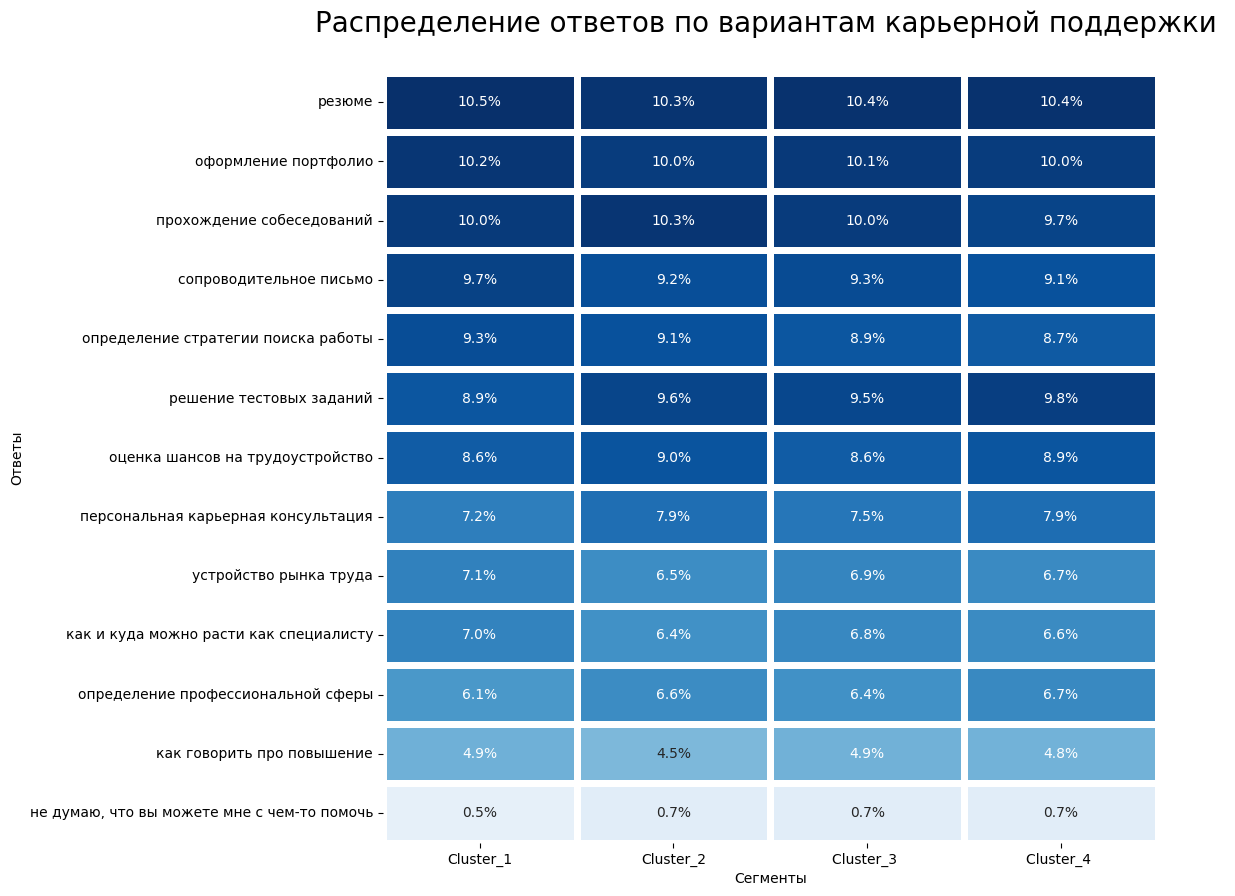

In [ ]:
groups = data[['user_id','cluster']].drop_duplicates()
answers=answers.join(groups.set_index('user_id'), on='user_id',lsuffix='not')
Q4 = answers[answers['question']=='Q4.Опции'].pivot_table(index='user_answer', values='user_id', columns='cluster',\
                                                          aggfunc='nunique').sort_values('Cluster_1', ascending=False)
Q4_prct = Q4.copy().T
cols = Q4_prct .columns.values
Q4_prct[cols] = Q4_prct[cols].div(Q4_prct[cols].sum(axis=1), axis=0)

heatmapCr(Q4_prct.T, 'Распределение ответов по вариантам карьерной поддержки', 'Сегменты', 'Ответы', \
          figsize=(10, 10), fmt='.1%', vmin=-0.005, fontsize=20)

Для всех категорий студентов актуальтны разные формы карьерной поддержки вне зависимости от знаний и уверенности в знаниях

# Вывод


Перед нами стояла задача составить портреты студентов курсов Практикум, выделить значимые закономерности, сегментировать студентов (по 2м и более показателям), выявить особенности сегментов, сформулировать на основе данных гипотезы по улучшению выстраивания помощи студентам в достижении их целей.  
Большинство пользователей обучаются на data-analyst и data-scientist. На третьем месте Системные аналитики, дальше следуют точечные направления.
Чуть более половины студентов оплачивают обучение с помощью государственных дотаций (1681). На втором месте с небольшим отрывом те, кто учится за свой счет (1445). Некоторые студенты переходят с государственного на собственное финансирование, возможно из-за проблем со сроками.
Обучающихся за счет работодателя мало, всего 20 человек. Яндексу стоит потратить усилия для привлечения бизнес-клиентов.

Основная цель студентов – сменить работу Большинство приходят учиться без опыта работы Записываются в карьерный трек во время обучения около 40%, а активно ищут работу я около 20% Самые востребованные опции карьерного центра: составление резюме, портфолио, навыки прохождения собеседования. Только 1% считает что им не нужна помощь.  
Различия по направлениям обучения:

`Аналитик данных`(43% всех студентов) и `Аналитик данных плюс`(5%) в основном выбирают люди, которые хотят сменить область деятельности, но не имеют возможности или потребности делать это в сжатые сроки. Также курс привлекателен для собственников бизнеса и уже работающих в этой или смежной областях людей. Большинство участников ставит перед собой цель смены работы, но есть и те, кто проходит курс для совершенствования на текущем месте.
`Аналитик данных буткемп` (0.5%) выбирают люди, которые в данный момент не имеют постоянной работы и готовы потратить много сил и времени на обучение для трудоустройства.
`Специалист по Data Science`(33%) и`Специалист по Data Science плюс` (3%)выбирают не только люди, которые хотят сменить область деятельности (хоть их больше половины), но и имеющие опыт с целью повысить квалификацию и получить новую работу или должность. Также обучение привлекательно для владельцев бизнеса. Ученики не имеют возможности или потребности получать знания и менять работу в срочном порядке. 
Почти половина людей, выбирающих `Data Science буткемп`(0.3%) уже имеет опыт в IT и ставит целью профессиональный рост и смену работы (видимо в рамках такого роста). Можно предположить что учащиеся должны быть хорошо мотивированы и иметь высокую успеваемость.
`Системный аналитик`(9%) привлекателен для людей с опытом больше, чем для новичков. Значительная часть учащихся ставит целью повышение квалификации. Активно ищут работу всего 15%, что может указывать на то, что большинство имеет работу, но стремится сменить компанию или должность.
 `SQL для работы с данными и аналитикой`(4.4%) выбирают люди, которые работают в аналитике, IT или смежных областях с целью получения новых знаний и опыта. 

`Визуализация данных и введение в BI инструменты`(0.8%) выбирают люди с опытом работы для повышения квалификации. Треть из них не нуждается в помощи с трудоустройством, мало кто активно ищет работу. Интересно, что это самый привлекательный курс для собственников бизнеса.

Курс `Инженер данных` (0.4%)выбирает больше всего людей с опытом в аналитике и других областях IT, что закономерно поскольку он адресован людям с опытом определенными и знаниями. Активно ищут работу в два раза больше людей, чем участвуют в карьерном. Видимо у многих уже есть свой карьерный план. 

`Математика для анализа данных` (0.3%)- дополнительный курс для прокачки имеющихся навыков и знаний. Востребован как новичками, так и специалистами для повышения квалификации.

Часть опросника имеет не совсем точные формулировки:  
**Цель: сменить работу** 
Должна быть разбита на 2 категории:  1- хотят сменить область деятельности (как правило новички), 2 – хотят сменить компанию-работодателя (учатся для повышения квалификации). 
**Нашли работу в процессе обучения: нет**
Должна быть разбита на 2 категории: 1- ищу, но не нашел, 2- не ищу.
**Нашли работу в процессе обучения: да**
Должна быть разбита на 2 категории: 1- искал и нашел (желательно уточнить пригодилось ли обучение), 2- уже трудоустроен и менять не собираюсь.

В зависимости от вида оплаты  
Государственными программами чаще всего пользуются новички (73%) с целью сменить работу (70%). Большая часть (95%) нуждается в помощи в трудоустройстве, треть (35%) записывается в карьерный трек во время обучения. Имеют опыт в аналитике всего 10%, в других направлениях IT – 17%.
За свой счет учится больше людей с опытом, чем по государственным программам: 20% работали в других областях IT, 21% работали в аналитике. Цель большинства – сменить работу (62%). Больше всего пользуются карьерным треком во время обучения (39%).
За счет бизнеса учатся люди, которые хотят продвинуться по карьерной лестнице или получить повышение зарплаты (46%), улучшить свои знания (20%). Некоторые указали смену работы (33%), 12% записались в карьерный трек, 4% активно ищут работу. Это говорит о том, что в этой группе не только повышающие квалификацию за счет компании. Возможно есть люди, которым удобнее оплачивать учебу от юридического лица (например собственного ИП).
Также неожиданным кажется что в этой категории никто не выбрал развитие собственного бизнеса (в других категориях по 2%). Нужно подробнее изучить эту группу для дальнейшего привлечения в Яндекс.

Для оценки студента  используется две шкалы:
learning performance – от 0 до 1
уверенность в знаниях content от -2 до 2
Эффективность большинства студентов 0,7-0,8, уверенность в знаниях  1-2
Эффективность и опыт не коррелируются между собой
Есть интересные отличия эффективности и уверенности
- более уверенные с опытом работы от 1 года до 3х
- более знающие с опытом работы более 3х лет
- более уверенные в активном поиске работы
- более эффективные уже нашли
- более уверенные уже записались на карьерынй трек  

Люди без опыта в IT идут на обучение с основной целью – сменить работу (76%). Видимо имеется в виду смена области деятельности. Уже имеющие опыт в анализе данных (независимо от срока) стремятся получить новые знания чтобы повысить зарплату (21% - 27%). С опытом менее 1 года заинтересованы продвинуться по карьерной лестнице (17%) и сменить работу (42%), видимо подразумевая смену работодателя. С опытом более 1 года и более 3 лет заинтересованы структурировать знания (17% и 15%) и возможно сменить работу (31% и 28%), также видимо подразумевая смену работодателя, а не область деятельности. Имеющие опыт в других направлениях IT учатся на аналитике чтобы сменить работу (49% - 55%). Они также указывают целями обучения повышение зарплаты (13%-16%), получение новых знаний (12%-16%), продвижение по карьерной лестнице (10% - 12%). Можно предположить что они изучили на собственном опыте разные специализации IT и сделали осознанный выбор будущей профессии, решили дальше развиваться в аналитике.
Судя по данному распределению помощь с карьерой необходима людям без опыта и нужна многим людям с опытом в других направлениях IT и в меньшей мере имеющим опыт в аналитике - только 8% заявили, что не планируют участвовать в карьерном треке.
При составлении портрета пользователей мы рассмотрели распределение опций помощи карьерного центра по направлениям обучения и не нашли зависимостей. Было предположение что эти опции могут зависеть от опыта работы.
Запросы отличаются мало,все опции востребованы примерно одинаково. Самыми важными для всех являются навыки самопрезентации: составление резюме, оформление портфолио, прохождение собеседований. Одинаково важным все считают изучение рынка труда и своей ниши в нем: определение стратегии поиска, оценка шансов, персональная консультация. Определение профессиональной сферы больше волнует новичков, в меньшей степени опытных специалистов. Как говорить про повышение интересует специалистов больше, чем новичков. Только 1% в каждой группе считает, что помощь не нужна. Можно сделать вывод, что все опции помощи карьерного центра одинаково важны всем обучающимся, независимо от выбранной специальности и опыта работы.

Сформируем **4 сегмента студентов** в зависимости от уверенности  в себе и эффективности

|Сегмент    | Расшифровка  | learn_perf_avg|content_avg |
|----------|----------|------------------|---------------|
| 11    |  Эффективные, уверенные в себе   | 0,83|1,51|
| 12    |  Эффективные, неуверенные в себе   | 0,81|0,16|
| 21    |  Неэффективные, уверенные в себе    |0,62|1,49|
| 22    | Неэффективные, неуверенные в себе    |0,62|0,05|


Распределение направлений обучения среди выделенных сегментов
Системные аналитики - студенты с самой высокой эффективностью и уверенностью в собственных знаниях. Это подтвердает то факт, что среди них много людей с оптытом работы в анализе данных/IT
Аналогично Дата Инженеры - 60% высокая эффективность и уверенность
Больше всего неэффективных студентов на курсах, которые выбирают новички:
Аналитик данных» и «Специалист по Data Science». При этом половина неэффективных студентов уверены в своих силах, а половина – нет.
На курсе Математика для ДА и ДС высокая доля студентов с низкой эффективность (21).
Возможно курс сложен для понимания и треьует доработки и/или большего технического сопровождения(помощи)

Посмотрим как распределяется опыт внутри наших сегментов студентов
Самые опытные студенты действительно демонстрируют высокую эффективность а также уверены в своих знаниях.
Среди начинающих высокая доля тех кто обладает низкой эффективностью, но уверен в своих знаниях.
Среди студентов с опытом в других направлниях IT никто не выделяется

Для всех категорий студентов актуальтны разные формы карьерной поддержки вне зависимости от знаний и уверенности в знаниях  

  **Гипотезы и рекомендации** 

  Неэффективным студентам оказывать техническую тоддержку для увеличения знаний  
  Неуверенным - поддержку в виде коучевых техник, открытых собеседований, расширенной обратной связи от ревьюверов  
  Всем группам оказывать равную помощь в карьерной поддержке - самые важные 
 навыках самопрезентации: составление резюме, оформление портфолио,  прохождение собеседований.  
 Для новичнов доп актуально определние проф идентичности  
 




